# W1D4

# Dimensionality Reduction

## Tutorial 1: Geometric view of data

Explore how multivariate data can be represented in different orthonormal bases

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# @title Figure Settings
import logging
logging.getLogger('matplotlib.font_manager').disabled = True

import ipywidgets as widgets  # interactive display
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/main/nma.mplstyle")

In [3]:
# @title Plotting Functions

def plot_data(X):
  """
  Plots bivariate data. Includes a plot of each random variable, and a scatter
  plot of their joint activity. The title indicates the sample correlation
  calculated from the data.

  Args:
    X (numpy array of floats) : Data matrix each column corresponds to a
                                different random variable

  Returns:
    Nothing.
  """

  fig = plt.figure(figsize=[8, 4])
  gs = fig.add_gridspec(2, 2)
  ax1 = fig.add_subplot(gs[0, 0])
  ax1.plot(X[:, 0], color='k')
  plt.ylabel('Neuron 1')
  plt.title(f'Sample var 1: {np.var(X[:, 0]):.1f}')
  ax1.set_xticklabels([])
  ax2 = fig.add_subplot(gs[1, 0])
  ax2.plot(X[:, 1], color='k')
  plt.xlabel('Sample Number')
  plt.ylabel('Neuron 2')
  plt.title(f'Sample var 2: {np.var(X[:, 1]):.1f}')
  ax3 = fig.add_subplot(gs[:, 1])
  ax3.plot(X[:, 0], X[:, 1], '.', markerfacecolor=[.5, .5, .5],
           markeredgewidth=0)
  ax3.axis('equal')
  plt.xlabel('Neuron 1 activity')
  plt.ylabel('Neuron 2 activity')
  plt.title(f'Sample corr: {np.corrcoef(X[:, 0], X[:, 1])[0, 1]:.1f}')
  plt.show()


def plot_basis_vectors(X, W):
  """
  Plots bivariate data as well as new basis vectors.

  Args:
    X (numpy array of floats) : Data matrix each column corresponds to a
                                different random variable
    W (numpy array of floats) : Square matrix representing new orthonormal
                                basis each column represents a basis vector

  Returns:
    Nothing.
  """

  plt.figure(figsize=[4, 4])
  plt.plot(X[:, 0], X[:, 1], '.', color=[.5, .5, .5], label='Data')
  plt.axis('equal')
  plt.xlabel('Neuron 1 activity')
  plt.ylabel('Neuron 2 activity')
  plt.plot([0, W[0, 0]], [0, W[1, 0]], color='r', linewidth=3,
           label='Basis vector 1')
  plt.plot([0, W[0, 1]], [0, W[1, 1]], color='b', linewidth=3,
           label='Basis vector 2')
  plt.legend()
  plt.show()


def plot_data_new_basis(Y):
  """
  Plots bivariate data after transformation to new bases.
  Similar to plot_data but with colors corresponding to projections onto
  basis 1 (red) and basis 2 (blue). The title indicates the sample correlation
  calculated from the data.

  Note that samples are re-sorted in ascending order for the first
  random variable.

  Args:
    Y (numpy array of floats) : Data matrix in new basis each column
                                corresponds to a different random variable

  Returns:
    Nothing.
  """
  fig = plt.figure(figsize=[8, 4])
  gs = fig.add_gridspec(2, 2)
  ax1 = fig.add_subplot(gs[0, 0])
  ax1.plot(Y[:, 0], 'r')
  plt.xlabel
  plt.ylabel('Projection \n basis vector 1')
  plt.title(f'Sample var 1: {np.var(Y[:, 0]):.1f}')
  ax1.set_xticklabels([])
  ax2 = fig.add_subplot(gs[1, 0])
  ax2.plot(Y[:, 1], 'b')
  plt.xlabel('Sample number')
  plt.ylabel('Projection \n basis vector 2')
  plt.title(f'Sample var 2: {np.var(Y[:, 1]):.1f}')
  ax3 = fig.add_subplot(gs[:, 1])
  ax3.plot(Y[:, 0], Y[:, 1], '.', color=[.5, .5, .5])
  ax3.axis('equal')
  plt.xlabel('Projection basis vector 1')
  plt.ylabel('Projection basis vector 2')
  plt.title(f'Sample corr: {np.corrcoef(Y[:, 0], Y[:, 1])[0, 1]:.1f}')
  plt.show()

**row** is firing rate of all neurons at single timepoint \
**column** is firing rate for one neuron at all timepoints

### Section 1: Generate correlated multivariate data

In [4]:
# @markdown Execute this cell to get helper function `get_data`

def get_data(cov_matrix):
  """
  Returns a matrix of 1000 samples from a bivariate, zero-mean Gaussian.

  Note that samples are sorted in ascending order for the first random variable

  Args:
    cov_matrix (numpy array of floats): desired covariance matrix

  Returns:
    (numpy array of floats) : samples from the bivariate Gaussian, with each
                              column corresponding to a different random
                              variable
  """

  mean = np.array([0, 0])
  X = np.random.multivariate_normal(mean, cov_matrix, size=1000)
  indices_for_sorting = np.argsort(X[:, 0])
  X = X[indices_for_sorting, :]

  return X

help(get_data)

Help on function get_data in module __main__:

get_data(cov_matrix)
    Returns a matrix of 1000 samples from a bivariate, zero-mean Gaussian.
    
    Note that samples are sorted in ascending order for the first random variable
    
    Args:
      cov_matrix (numpy array of floats): desired covariance matrix
    
    Returns:
      (numpy array of floats) : samples from the bivariate Gaussian, with each
                                column corresponding to a different random
                                variable



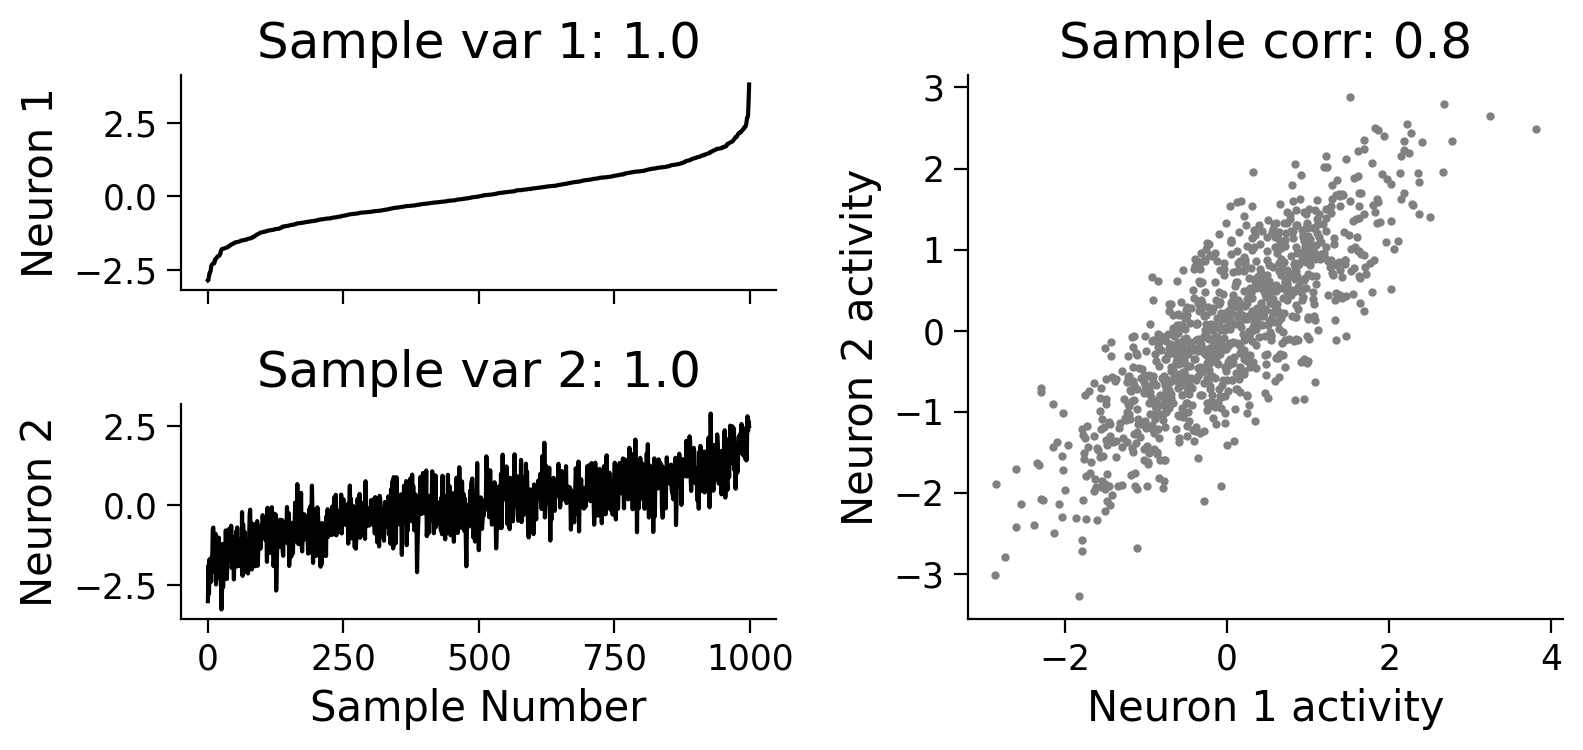

In [5]:
def calculate_cov_matrix(var_1, var_2, corr_coef):
  """
  Calculates the covariance matrix based on the variances and correlation
  coefficient.

  Args:
    var_1 (scalar)          : variance of the first random variable
    var_2 (scalar)          : variance of the second random variable
    corr_coef (scalar)      : correlation coefficient

  Returns:
    (numpy array of floats) : covariance matrix
  """

  # Calculate the covariance from the variances and correlation
  cov = corr_coef * np.sqrt(var_1 * var_2)

  cov_matrix = np.array([[var_1, cov], [cov, var_2]])

  return cov_matrix


# Set parameters
np.random.seed(2020)  # set random seed
variance_1 = 1
variance_2 = 1
corr_coef = 0.8

# Compute covariance matrix
cov_matrix = calculate_cov_matrix(variance_1, variance_2, corr_coef)

# Generate data with this covariance matrix
X = get_data(cov_matrix)

# Visualize
plot_data(X)

In [6]:
# @markdown Execute this cell to enable widget

def _calculate_cov_matrix(var_1, var_2, corr_coef):

  # Calculate the covariance from the variances and correlation
  cov = corr_coef * np.sqrt(var_1 * var_2)

  cov_matrix = np.array([[var_1, cov], [cov, var_2]])

  return cov_matrix


@widgets.interact(corr_coef = widgets.FloatSlider(value=.2, min=-1, max=1, step=0.1))
def visualize_correlated_data(corr_coef=0):
  variance_1 = 1
  variance_2 = 1

  # Compute covariance matrix
  cov_matrix = _calculate_cov_matrix(variance_1, variance_2, corr_coef)

  # Generate data with this covariance matrix
  X = get_data(cov_matrix)

  # Visualize
  plot_data(X)

interactive(children=(FloatSlider(value=0.2, description='corr_coef', max=1.0, min=-1.0), Output()), _dom_clas…

### Section 2: Define a new orthonormal basis

![Screenshot 2023-07-13 at 10.24.09 AM.png](attachment:81878ae3-0abd-42b6-9a41-5c7c92b60017.png)

**orthonormal**: orthogonal and all basis vectors have length 1 \
**orthogonal**: dot product is 0

![Screenshot 2023-07-13 at 10.26.55 AM.png](attachment:0cdd7290-2dac-4db0-87aa-857d3fcc2ab5.png)

![Screenshot 2023-07-13 at 10.20.48 AM.png](attachment:b15cee60-41f7-4b19-ba2a-06d8c19d7e93.png)

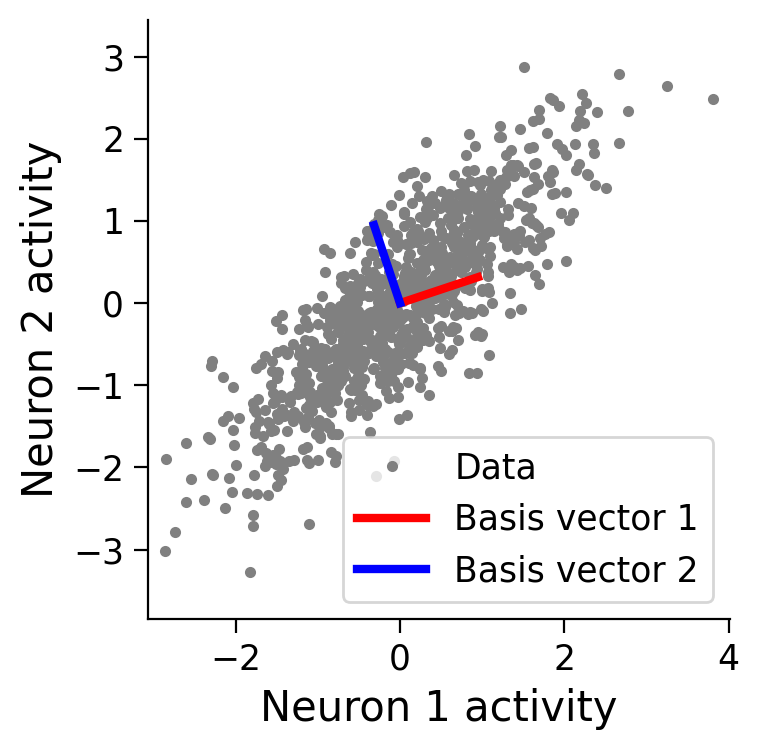

In [7]:
def define_orthonormal_basis(u):
  """
  Calculates an orthonormal basis given an arbitrary vector u.

  Args:
    u (numpy array of floats) : arbitrary 2-dimensional vector used for new
                                basis

  Returns:
    (numpy array of floats)   : new orthonormal basis
                                columns correspond to basis vectors
  """

  # Normalize vector u
  u = u / np.sqrt(np.sum([u[x]**2 for x in range(len(u))]))

  # Calculate vector w that is orthogonal to w
  w = [-u[1], u[0]]

  # Put in matrix form
  W = np.column_stack([u, w])

  return W


# Set up parameters
np.random.seed(2020)  # set random seed
variance_1 = 1
variance_2 = 1
corr_coef = 0.8
u = np.array([3, 1])

# Compute covariance matrix
cov_matrix = calculate_cov_matrix(variance_1, variance_2, corr_coef)

# Generate data
X = get_data(cov_matrix)

# Get orthonomal basis
W = define_orthonormal_basis(u)

# Visualize
plot_basis_vectors(X, W)

### Section 3: Project data onto new basis

![Screenshot 2023-07-13 at 10.36.04 AM.png](attachment:999198f9-d600-4662-a8b3-9f11da023911.png)

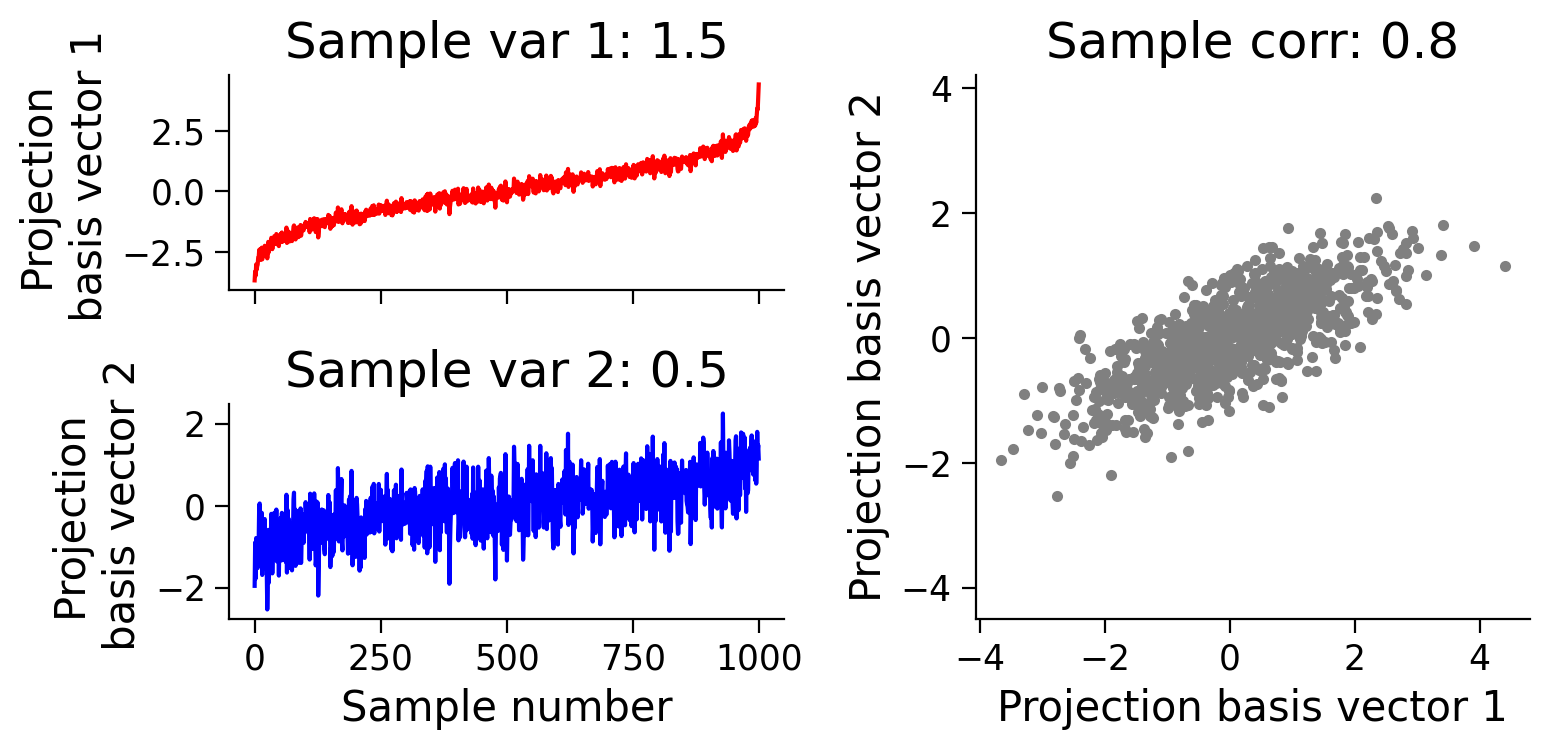

In [8]:
def change_of_basis(X, W):
  """
  Projects data onto new basis W.

  Args:
    X (numpy array of floats) : Data matrix each column corresponding to a
                                different random variable
    W (numpy array of floats) : new orthonormal basis columns correspond to
                                basis vectors

  Returns:
    (numpy array of floats)    : Data matrix expressed in new basis
  """

  # Project data onto new basis described by W
  Y = X @ W

  return Y


# Project data to new basis
Y = change_of_basis(X, W)

# Visualize
plot_data_new_basis(Y)

In [9]:
# @markdown Make sure you execute this cell to enable the widget!

def refresh(theta=0):
  u = np.array([1, np.tan(theta * np.pi / 180)])
  W = define_orthonormal_basis(u)
  Y = change_of_basis(X, W)
  plot_basis_vectors(X, W)
  plot_data_new_basis(Y)


_ = widgets.interact(refresh, theta=(0, 90, 5))

interactive(children=(IntSlider(value=0, description='theta', max=90, step=5), Output()), _dom_classes=('widge…

## Tutorial 2: Principal Component Analysis

perform PCA by projecting the data onto the eigenvectors of its covariance matrix

In [10]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# @title Figure Settings
import logging
logging.getLogger('matplotlib.font_manager').disabled = True

import ipywidgets as widgets  # interactive display
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/main/nma.mplstyle")

In [12]:
# @title Plotting Functions

def plot_eigenvalues(evals):
  """
  Plots eigenvalues.

  Args:
      (numpy array of floats) : Vector of eigenvalues

  Returns:
    Nothing.

  """
  plt.figure(figsize=(4, 4))
  plt.plot(np.arange(1, len(evals) + 1), evals, 'o-k')
  plt.xlabel('Component')
  plt.ylabel('Eigenvalue')
  plt.title('Scree plot')
  plt.xticks(np.arange(1, len(evals) + 1))
  plt.ylim([0, 2.5])
  plt.show()


def plot_data(X):
  """
  Plots bivariate data. Includes a plot of each random variable, and a scatter
  scatter plot of their joint activity. The title indicates the sample
  correlation calculated from the data.

  Args:
    X (numpy array of floats) : Data matrix each column corresponds to a
                                different random variable

  Returns:
    Nothing.
  """

  fig = plt.figure(figsize=[8, 4])
  gs = fig.add_gridspec(2, 2)
  ax1 = fig.add_subplot(gs[0, 0])
  ax1.plot(X[:, 0], color='k')
  plt.ylabel('Neuron 1')
  ax2 = fig.add_subplot(gs[1, 0])
  ax2.plot(X[:, 1], color='k')
  plt.xlabel('Sample Number (sorted)')
  plt.ylabel('Neuron 2')
  ax3 = fig.add_subplot(gs[:, 1])
  ax3.plot(X[:, 0], X[:, 1], '.', markerfacecolor=[.5, .5, .5],
           markeredgewidth=0)
  ax3.axis('equal')
  plt.xlabel('Neuron 1 activity')
  plt.ylabel('Neuron 2 activity')
  plt.title('Sample corr: {:.1f}'.format(np.corrcoef(X[:, 0], X[:, 1])[0, 1]))
  plt.show()


def plot_data_new_basis(Y):
  """
  Plots bivariate data after transformation to new bases. Similar to plot_data
  but with colors corresponding to projections onto basis 1 (red) and
  basis 2 (blue).
  The title indicates the sample correlation calculated from the data.

  Note that samples are re-sorted in ascending order for the first random
  variable.

  Args:
    Y (numpy array of floats) : Data matrix in new basis each column
                                corresponds to a different random variable

  Returns:
    Nothing.
  """

  fig = plt.figure(figsize=[8, 4])
  gs = fig.add_gridspec(2, 2)
  ax1 = fig.add_subplot(gs[0, 0])
  ax1.plot(Y[:, 0], 'r')
  plt.ylabel('Projection \n basis vector 1')
  ax2 = fig.add_subplot(gs[1, 0])
  ax2.plot(Y[:, 1], 'b')
  plt.xlabel('Sample number')
  plt.ylabel('Projection \n basis vector 2')
  ax3 = fig.add_subplot(gs[:, 1])
  ax3.plot(Y[:, 0], Y[:, 1], '.', color=[.5, .5, .5])
  ax3.axis('equal')
  plt.xlabel('Projection basis vector 1')
  plt.ylabel('Projection basis vector 2')
  plt.title('Sample corr: {:.1f}'.format(np.corrcoef(Y[:, 0], Y[:, 1])[0, 1]))
  plt.show()


def plot_basis_vectors(X, W):
  """
  Plots bivariate data as well as new basis vectors.

  Args:
    X (numpy array of floats) : Data matrix each column corresponds to a
                                different random variable
    W (numpy array of floats) : Square matrix representing new orthonormal
                                basis each column represents a basis vector

  Returns:
    Nothing.
  """

  plt.figure(figsize=[4, 4])
  plt.plot(X[:, 0], X[:, 1], '.', color=[.5, .5, .5], label='Data')
  plt.axis('equal')
  plt.xlabel('Neuron 1 activity')
  plt.ylabel('Neuron 2 activity')
  plt.plot([0, W[0, 0]], [0, W[1, 0]], color='r', linewidth=3,
           label='Basis vector 1')
  plt.plot([0, W[0, 1]], [0, W[1, 1]], color='b', linewidth=3,
           label='Basis vector 2')
  plt.legend()
  plt.show()

In [13]:
# @title Helper functions

def sort_evals_descending(evals, evectors):
  """
  Sorts eigenvalues and eigenvectors in decreasing order. Also aligns first two
  eigenvectors to be in first two quadrants (if 2D).

  Args:
    evals (numpy array of floats)    : Vector of eigenvalues
    evectors (numpy array of floats) : Corresponding matrix of eigenvectors
                                        each column corresponds to a different
                                        eigenvalue

  Returns:
    (numpy array of floats)          : Vector of eigenvalues after sorting
    (numpy array of floats)          : Matrix of eigenvectors after sorting
  """

  index = np.flip(np.argsort(evals))
  evals = evals[index]
  evectors = evectors[:, index]
  if evals.shape[0] == 2:
    if np.arccos(np.matmul(evectors[:, 0],
                           1 / np.sqrt(2) * np.array([1, 1]))) > np.pi / 2:
      evectors[:, 0] = -evectors[:, 0]
    if np.arccos(np.matmul(evectors[:, 1],
                           1 / np.sqrt(2) * np.array([-1, 1]))) > np.pi / 2:
      evectors[:, 1] = -evectors[:, 1]
  return evals, evectors


def get_data(cov_matrix):
  """
  Returns a matrix of 1000 samples from a bivariate, zero-mean Gaussian

  Note that samples are sorted in ascending order for the first random
  variable.

  Args:
    var_1 (scalar)                     : variance of the first random variable
    var_2 (scalar)                     : variance of the second random variable
    cov_matrix (numpy array of floats) : desired covariance matrix

  Returns:
    (numpy array of floats)            : samples from the bivariate Gaussian,
                                          with each column corresponding to a
                                          different random variable
  """

  mean = np.array([0, 0])
  X = np.random.multivariate_normal(mean, cov_matrix, size=1000)
  indices_for_sorting = np.argsort(X[:, 0])
  X = X[indices_for_sorting, :]
  return X


def calculate_cov_matrix(var_1, var_2, corr_coef):
  """
  Calculates the covariance matrix based on the variances and
  correlation coefficient.

  Args:
    var_1 (scalar)         :  variance of the first random variable
    var_2 (scalar)         :  variance of the second random variable
    corr_coef (scalar)     :  correlation coefficient

  Returns:
    (numpy array of floats) : covariance matrix
  """
  cov = corr_coef * np.sqrt(var_1 * var_2)
  cov_matrix = np.array([[var_1, cov], [cov, var_2]])
  return cov_matrix


def define_orthonormal_basis(u):
  """
  Calculates an orthonormal basis given an arbitrary vector u.

  Args:
    u (numpy array of floats) : arbitrary 2D vector used for new basis

  Returns:
    (numpy array of floats)   : new orthonormal basis columns correspond to
                                basis vectors
  """

  u = u / np.sqrt(u[0] ** 2 + u[1] ** 2)
  w = np.array([-u[1], u[0]])
  W = np.column_stack((u, w))
  return W


def change_of_basis(X, W):
  """
  Projects data onto a new basis.

  Args:
    X (numpy array of floats) : Data matrix each column corresponding to a
                                different random variable
    W (numpy array of floats) : new orthonormal basis columns correspond to
                                basis vectors

  Returns:
    (numpy array of floats)   : Data matrix expressed in new basis
  """

  Y = np.matmul(X, W)
  return Y

find directions of maximal variance and use them to construct orthonormal basis \
each PC is orthogonal to the previous

![Screenshot 2023-07-13 at 10.44.25 AM.png](attachment:b2ad6585-55ea-4778-abd7-8467c3d3e0fb.png)

a vector for which linear transformation is just a scaling \
variance when projection onto each eigenvector is given by eigenvalue

![Screenshot 2023-07-13 at 10.48.14 AM.png](attachment:89d87acb-297a-43aa-9e5c-48b942a23682.png)

### Section 1: Calculate the eigenvectors of the sample covariance matrix

![Screenshot 2023-07-13 at 10.49.49 AM.png](attachment:cad588ba-1abf-4b9b-a7bd-ebdcf7c70004.png)

In [14]:
X = get_data(cov_matrix)
print(X.shape)
np.mean(X, axis=0)

(1000, 2)


array([-0.05563585, -0.04598938])

In [15]:
def get_sample_cov_matrix(X):
  """
  Returns the sample covariance matrix of data X

  Args:
    X (numpy array of floats) : Data matrix each column corresponds to a
                                different random variable

  Returns:
    (numpy array of floats)   : Covariance matrix
  """

  # Subtract the mean of X
  X = X - np.mean(X, axis=0)

  # Calculate the covariance matrix (hint: use np.matmul)
  cov_matrix = np.matmul(X.T, X)/X.shape[0]

  return cov_matrix


# Set parameters
np.random.seed(2020)  # set random seed
variance_1 = 1
variance_2 = 1
corr_coef = 0.8

# Calculate covariance matrix
cov_matrix = calculate_cov_matrix(variance_1, variance_2, corr_coef)
print(cov_matrix)

# Generate data with that covariance matrix
X = get_data(cov_matrix)

# Get sample covariance matrix
sample_cov_matrix = get_sample_cov_matrix(X)
print(sample_cov_matrix)

[[1.  0.8]
 [0.8 1. ]]
[[0.99315313 0.82347589]
 [0.82347589 1.01281397]]


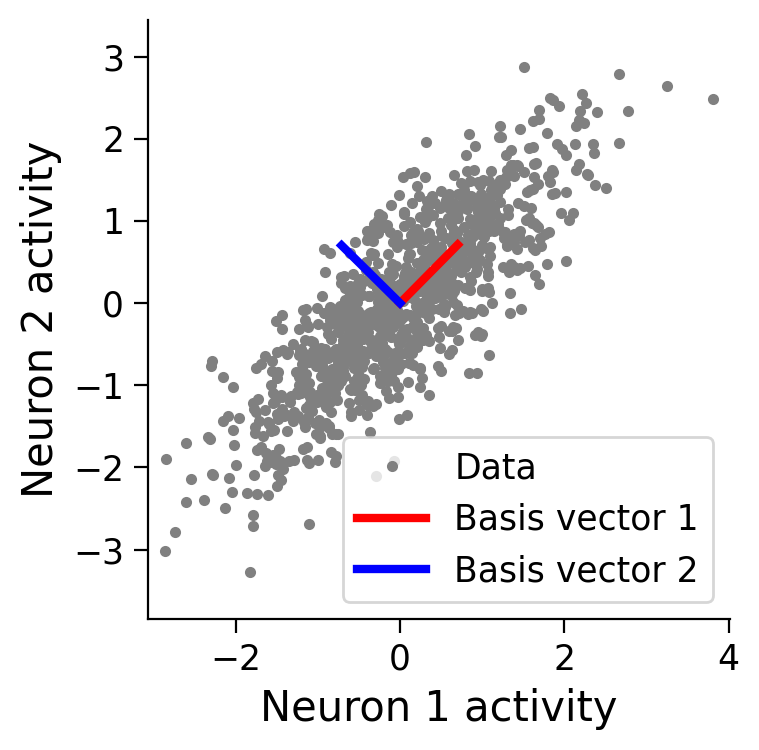

In [16]:
# Calculate the eigenvalues and eigenvectors
evals, evectors = np.linalg.eigh(sample_cov_matrix)

# Sort the eigenvalues in descending order
evals, evectors = sort_evals_descending(evals, evectors)

# Visualize
plot_basis_vectors(X, evectors)

### Section 2: Perform PCA by projecting data onto the eigenvectors

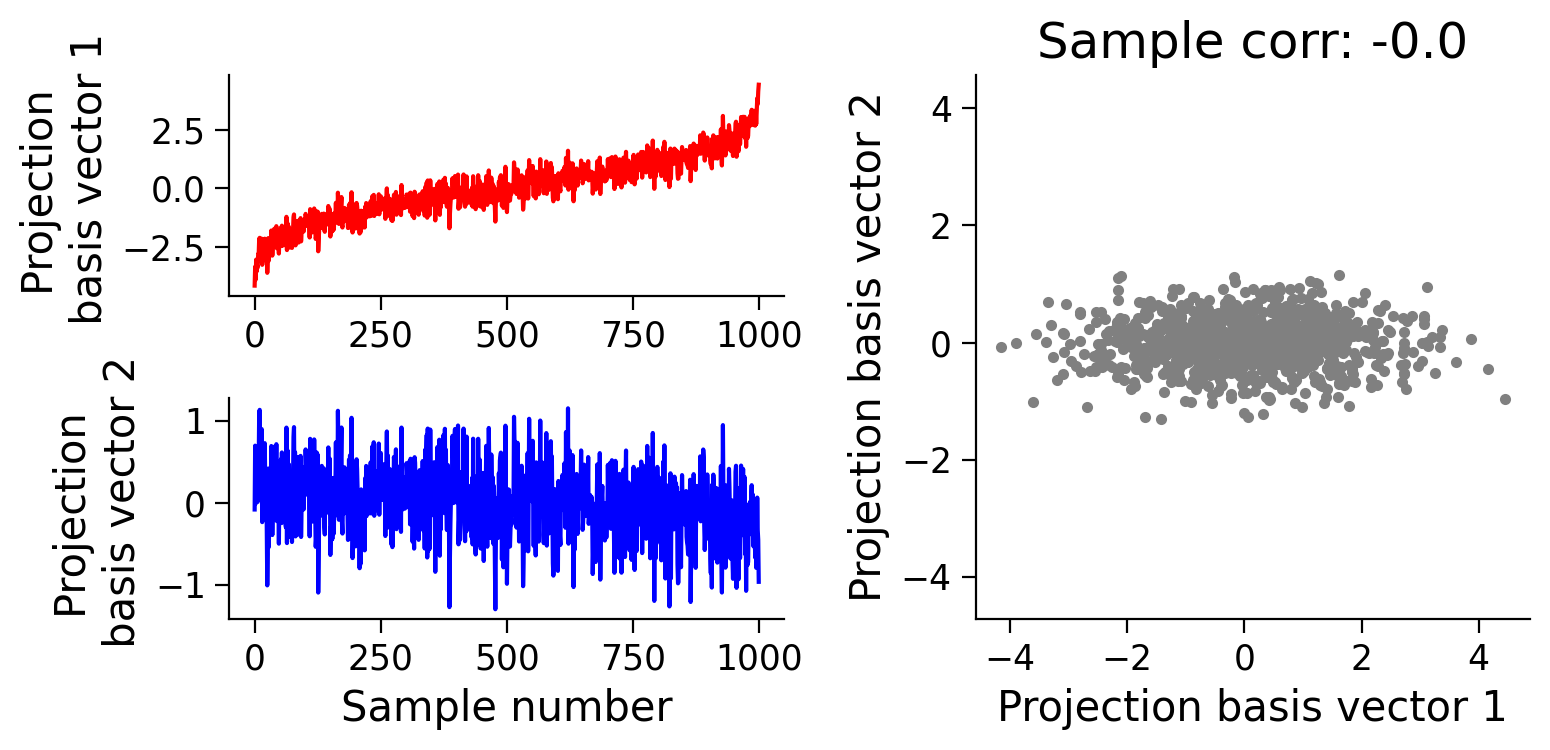

In [17]:
def pca(X):
  """
  Sorts eigenvalues and eigenvectors in decreasing order.

  Args:
    X (numpy array of floats): Data matrix each column corresponds to a
                               different random variable

  Returns:
    (numpy array of floats)  : Data projected onto the new basis
    (numpy array of floats)  : Vector of eigenvalues
    (numpy array of floats)  : Corresponding matrix of eigenvectors

  """

  # Calculate the sample covariance matrix
  cov_matrix = sample_cov_matrix = get_sample_cov_matrix(X)

  # Calculate the eigenvalues and eigenvectors
  evals, evectors = np.linalg.eigh(sample_cov_matrix)

  # Sort the eigenvalues in descending order
  evals, evectors = sort_evals_descending(evals, evectors)

  # Project the data onto the new eigenvector basis
  score = change_of_basis(X, evectors)

  return score, evectors, evals


# Perform PCA on the data matrix X
score, evectors, evals = pca(X)

# Plot the data projected into the new basis
plot_data_new_basis(score)

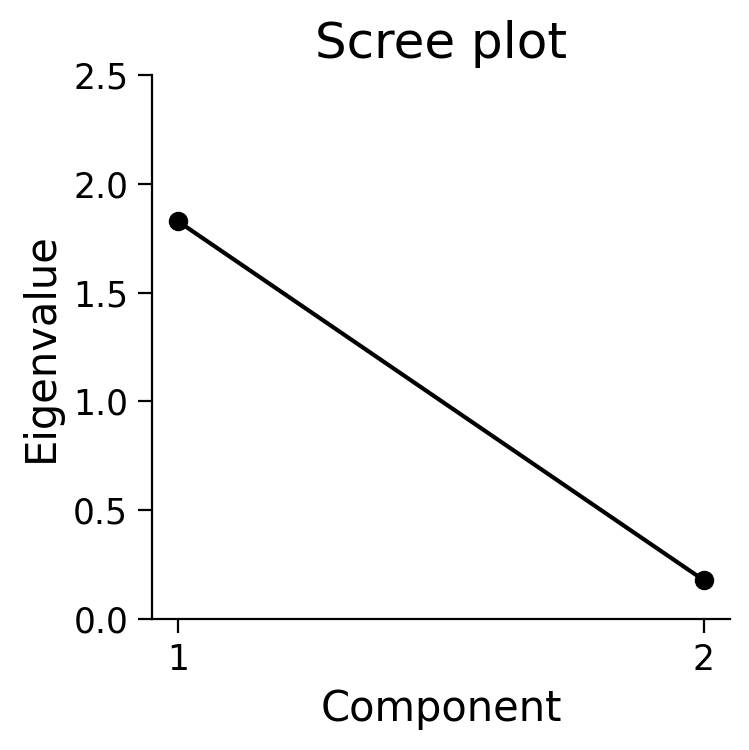

In [18]:
plot_eigenvalues(evals)

In [19]:
# @markdown Make sure you execute this cell to enable the widget!

def refresh(corr_coef=.8):
  cov_matrix = calculate_cov_matrix(variance_1, variance_2, corr_coef)
  X = get_data(cov_matrix)
  score, evectors, evals = pca(X)
  plot_eigenvalues(evals)
  plot_basis_vectors(X, evectors)


_ = widgets.interact(refresh, corr_coef=(-1, 1, .1))

interactive(children=(FloatSlider(value=0.8, description='corr_coef', max=1.0, min=-1.0), Output()), _dom_clas…

## Tutorial 3: Dimensionality Reduction & Reconstruction

In [20]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

In [21]:
# @title Figure Settings
import logging
logging.getLogger('matplotlib.font_manager').disabled = True

import ipywidgets as widgets  # interactive display
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/main/nma.mplstyle")

In [22]:
# @title Plotting Functions

def plot_variance_explained(variance_explained):
  """
  Plots eigenvalues.

  Args:
    variance_explained (numpy array of floats) : Vector of variance explained
                                                 for each PC

  Returns:
    Nothing.

  """

  plt.figure()
  plt.plot(np.arange(1, len(variance_explained) + 1), variance_explained,
           '--k')
  plt.xlabel('Number of components')
  plt.ylabel('Variance explained')
  plt.show()


def plot_MNIST_reconstruction(X, X_reconstructed, keep_dims):
  """
  Plots 9 images in the MNIST dataset side-by-side with the reconstructed
  images.

  Args:
    X (numpy array of floats)               : Data matrix each column
                                              corresponds to a different
                                              random variable
    X_reconstructed (numpy array of floats) : Data matrix each column
                                              corresponds to a different
                                              random variable
    keep_dims (int)                         : Dimensions to keep

  Returns:
    Nothing.
  """

  plt.figure()
  ax = plt.subplot(121)
  k = 0
  for k1 in range(3):
    for k2 in range(3):
      k = k + 1
      plt.imshow(np.reshape(X[k, :], (28, 28)),
                 extent=[(k1 + 1) * 28, k1 * 28, (k2 + 1) * 28, k2 * 28],
                 vmin=0, vmax=255)
  plt.xlim((3 * 28, 0))
  plt.ylim((3 * 28, 0))
  plt.tick_params(axis='both', which='both', bottom=False, top=False,
                  labelbottom=False)
  ax.set_xticks([])
  ax.set_yticks([])
  plt.title('Data')
  plt.clim([0, 250])
  ax = plt.subplot(122)
  k = 0
  for k1 in range(3):
    for k2 in range(3):
      k = k + 1
      plt.imshow(np.reshape(np.real(X_reconstructed[k, :]), (28, 28)),
                 extent=[(k1 + 1) * 28, k1 * 28, (k2 + 1) * 28, k2 * 28],
                 vmin=0, vmax=255)
  plt.xlim((3 * 28, 0))
  plt.ylim((3 * 28, 0))
  plt.tick_params(axis='both', which='both', bottom=False, top=False,
                  labelbottom=False)
  ax.set_xticks([])
  ax.set_yticks([])
  plt.clim([0, 250])
  plt.title(f'Reconstructed K: {keep_dims}')
  plt.tight_layout()
  plt.show()


def plot_MNIST_sample(X):
  """
  Plots 9 images in the MNIST dataset.

  Args:
     X (numpy array of floats) : Data matrix each column corresponds to a
                                 different random variable

  Returns:
    Nothing.

  """

  fig, ax = plt.subplots()
  k = 0
  for k1 in range(3):
    for k2 in range(3):
      k = k + 1
      plt.imshow(np.reshape(X[k, :], (28, 28)),
                 extent=[(k1 + 1) * 28, k1 * 28, (k2+1) * 28, k2 * 28],
                 vmin=0, vmax=255)
  plt.xlim((3 * 28, 0))
  plt.ylim((3 * 28, 0))
  plt.tick_params(axis='both', which='both', bottom=False, top=False,
                  labelbottom=False)
  plt.clim([0, 250])
  ax.set_xticks([])
  ax.set_yticks([])
  plt.show()


def plot_MNIST_weights(weights):
  """
  Visualize PCA basis vector weights for MNIST. Red = positive weights,
  blue = negative weights, white = zero weight.

  Args:
     weights (numpy array of floats) : PCA basis vector

  Returns:
     Nothing.
  """

  fig, ax = plt.subplots()
  plt.imshow(np.real(np.reshape(weights, (28, 28))), cmap='seismic')
  plt.tick_params(axis='both', which='both', bottom=False, top=False,
                  labelbottom=False)
  plt.clim(-.15, .15)
  plt.colorbar(ticks=[-.15, -.1, -.05, 0, .05, .1, .15])
  ax.set_xticks([])
  ax.set_yticks([])
  plt.show()


def plot_eigenvalues(evals, xlimit=False):
  """
  Plots eigenvalues.

  Args:
     (numpy array of floats) : Vector of eigenvalues
     (boolean) : enable plt.show()
  Returns:
    Nothing.

  """

  plt.figure()
  plt.plot(np.arange(1, len(evals) + 1), evals, 'o-k')
  plt.xlabel('Component')
  plt.ylabel('Eigenvalue')
  plt.title('Scree plot')
  if xlimit:
    plt.xlim([0, 100])  # limit x-axis up to 100 for zooming
  plt.show()

In [23]:
# @title Helper Functions

def add_noise(X, frac_noisy_pixels):
  """
  Randomly corrupts a fraction of the pixels by setting them to random values.

  Args:
     X (numpy array of floats)  : Data matrix
     frac_noisy_pixels (scalar) : Fraction of noisy pixels

  Returns:
     (numpy array of floats)    : Data matrix + noise

  """

  X_noisy = np.reshape(X, (X.shape[0] * X.shape[1]))
  N_noise_ixs = int(X_noisy.shape[0] * frac_noisy_pixels)
  noise_ixs = np.random.choice(X_noisy.shape[0], size=N_noise_ixs,
                               replace=False)
  X_noisy[noise_ixs] = np.random.uniform(0, 255, noise_ixs.shape)
  X_noisy = np.reshape(X_noisy, (X.shape[0], X.shape[1]))

  return X_noisy


def change_of_basis(X, W):
  """
  Projects data onto a new basis.

  Args:
    X (numpy array of floats) : Data matrix each column corresponding to a
                                different random variable
    W (numpy array of floats) : new orthonormal basis columns correspond to
                                basis vectors

  Returns:
    (numpy array of floats)   : Data matrix expressed in new basis
  """

  Y = np.matmul(X, W)

  return Y


def get_sample_cov_matrix(X):
  """
  Returns the sample covariance matrix of data X.

  Args:
    X (numpy array of floats) : Data matrix each column corresponds to a
                                different random variable

  Returns:
    (numpy array of floats)   : Covariance matrix
"""

  X = X - np.mean(X, 0)
  cov_matrix = 1 / X.shape[0] * np.matmul(X.T, X)
  return cov_matrix


def sort_evals_descending(evals, evectors):
  """
  Sorts eigenvalues and eigenvectors in decreasing order. Also aligns first two
  eigenvectors to be in first two quadrants (if 2D).

  Args:
    evals (numpy array of floats)    :   Vector of eigenvalues
    evectors (numpy array of floats) :   Corresponding matrix of eigenvectors
                                         each column corresponds to a different
                                         eigenvalue

  Returns:
    (numpy array of floats)          : Vector of eigenvalues after sorting
    (numpy array of floats)          : Matrix of eigenvectors after sorting
  """

  index = np.flip(np.argsort(evals))
  evals = evals[index]
  evectors = evectors[:, index]
  if evals.shape[0] == 2:
    if np.arccos(np.matmul(evectors[:, 0],
                           1 / np.sqrt(2) * np.array([1, 1]))) > np.pi / 2:
      evectors[:, 0] = -evectors[:, 0]
    if np.arccos(np.matmul(evectors[:, 1],
                           1 / np.sqrt(2)*np.array([-1, 1]))) > np.pi / 2:
      evectors[:, 1] = -evectors[:, 1]

  return evals, evectors


def pca(X):
  """
  Performs PCA on multivariate data. Eigenvalues are sorted in decreasing order

  Args:
     X (numpy array of floats) :   Data matrix each column corresponds to a
                                   different random variable

  Returns:
    (numpy array of floats)    : Data projected onto the new basis
    (numpy array of floats)    : Corresponding matrix of eigenvectors
    (numpy array of floats)    : Vector of eigenvalues

  """

  X = X - np.mean(X, 0)
  cov_matrix = get_sample_cov_matrix(X)
  evals, evectors = np.linalg.eigh(cov_matrix)
  evals, evectors = sort_evals_descending(evals, evectors)
  score = change_of_basis(X, evectors)

  return score, evectors, evals

### Section 0: Intro to PCA

**% total variance explained** by first k components common way to assess intrinsic dimensionality

### Section 1: Perform PCA on MNIST

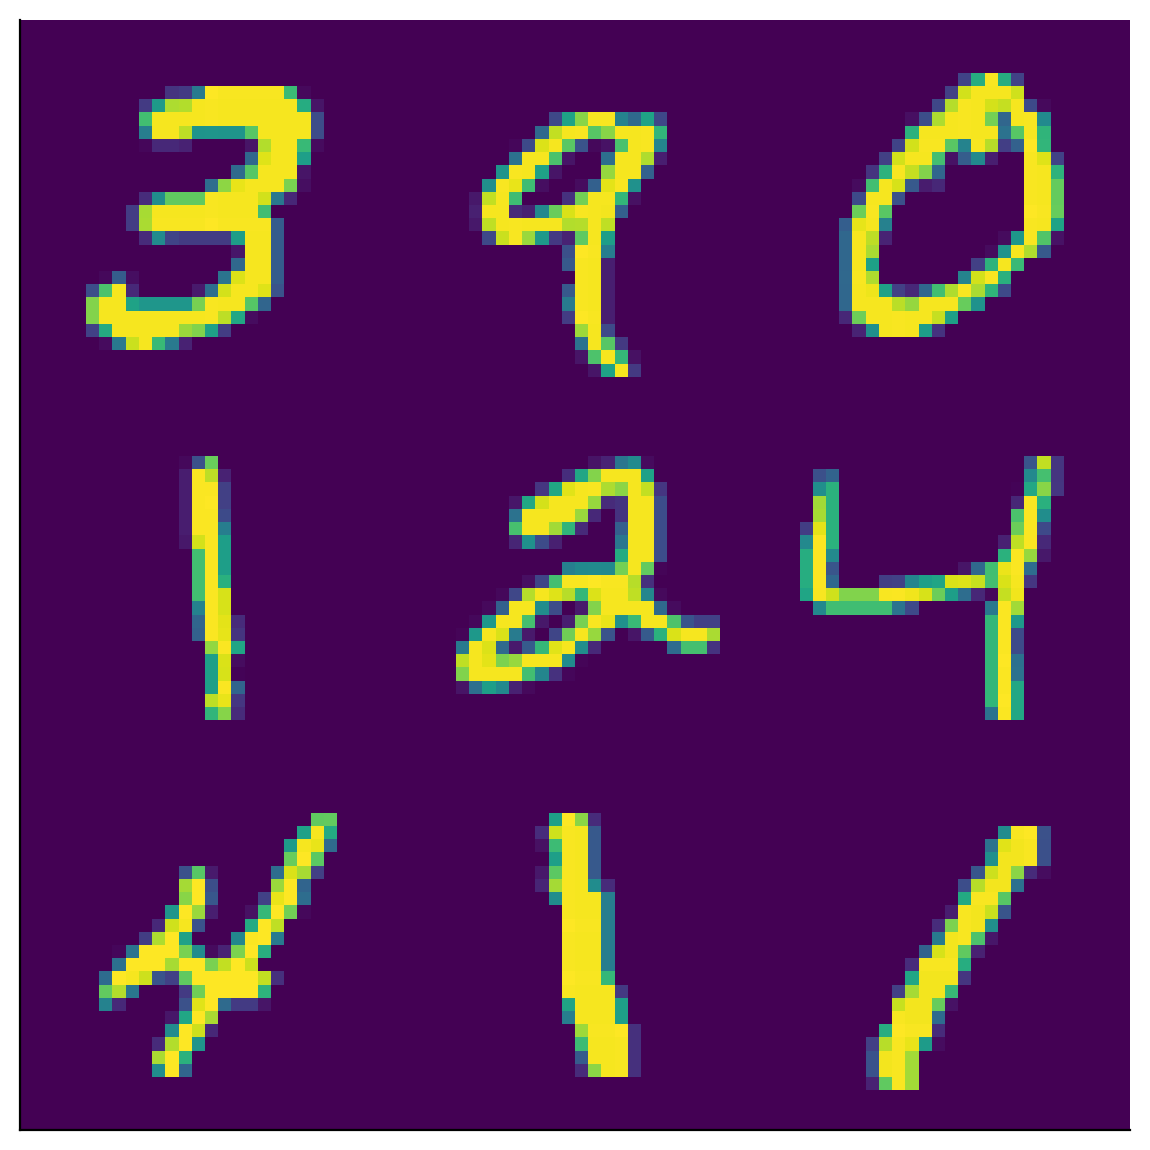

In [24]:
from sklearn.datasets import fetch_openml

# GET mnist data
mnist = fetch_openml(name='mnist_784', as_frame=False, parser='auto')
X = mnist.data

# Visualize
plot_MNIST_sample(X)

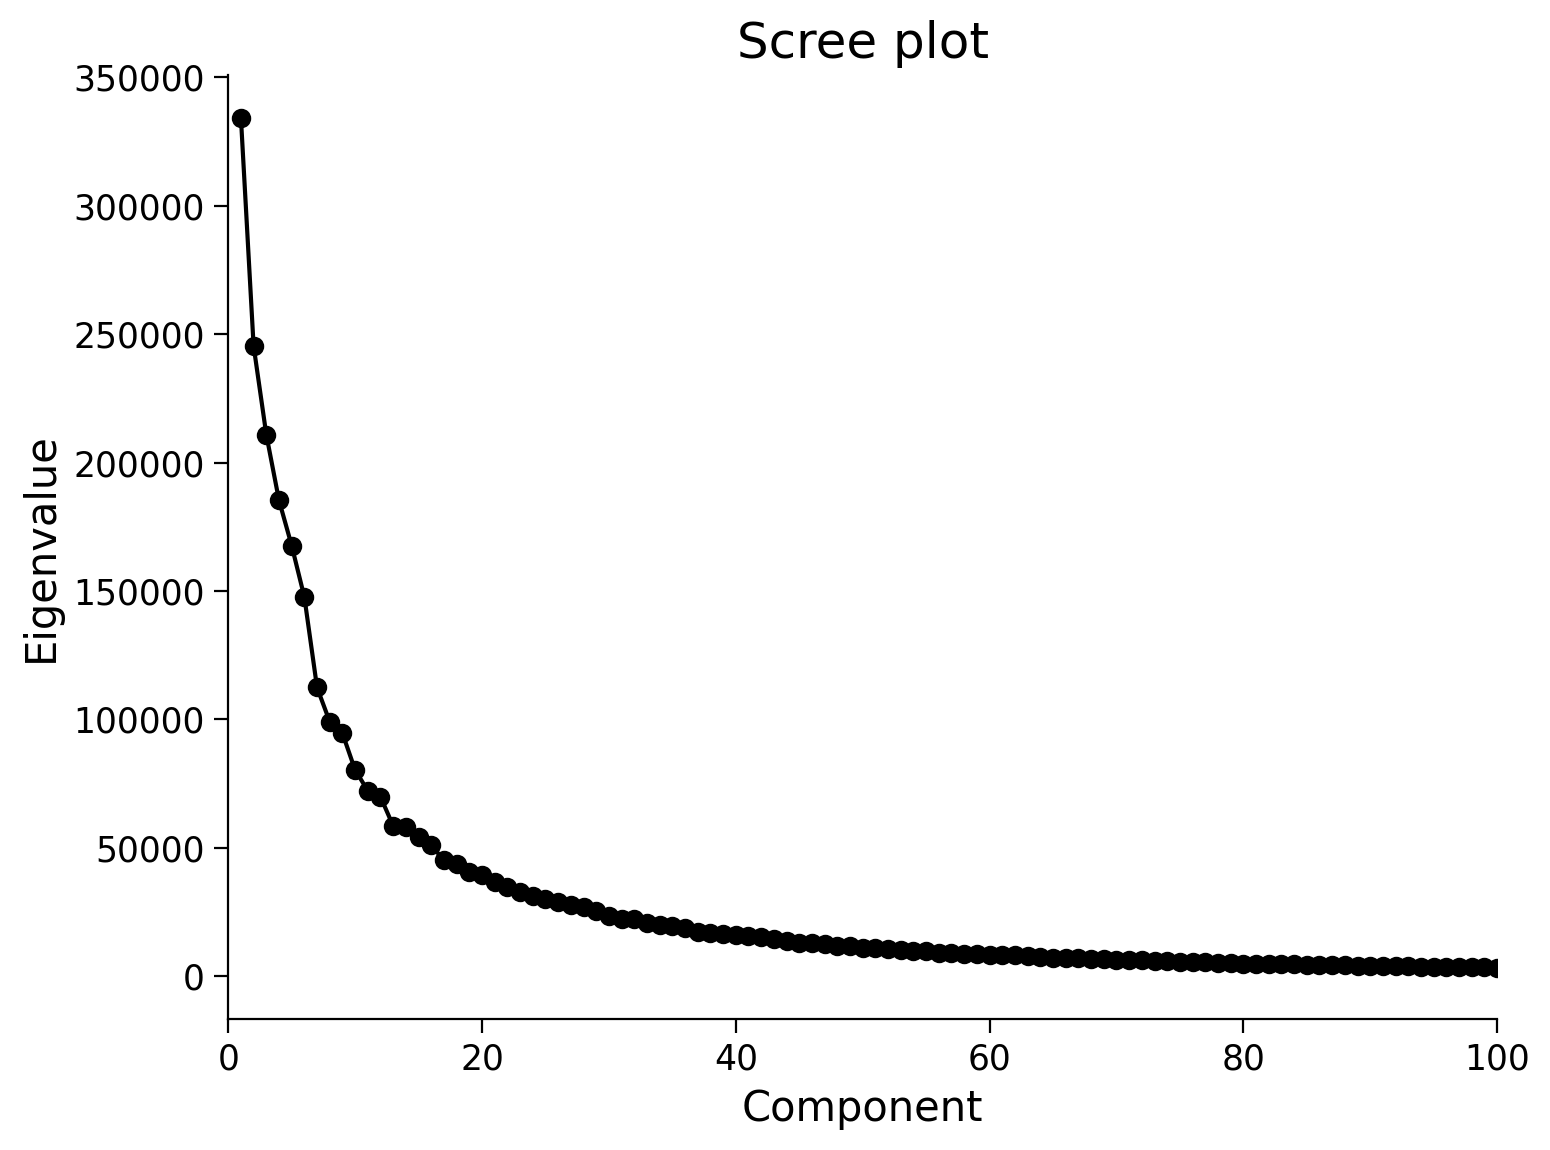

In [25]:
# Perform PCA
score, evectors, evals = pca(X)

# Plot the eigenvalues
plot_eigenvalues(evals, xlimit=True)  # limit x-axis up to 100 for zooming

### Section 2: Calculate the variance explained

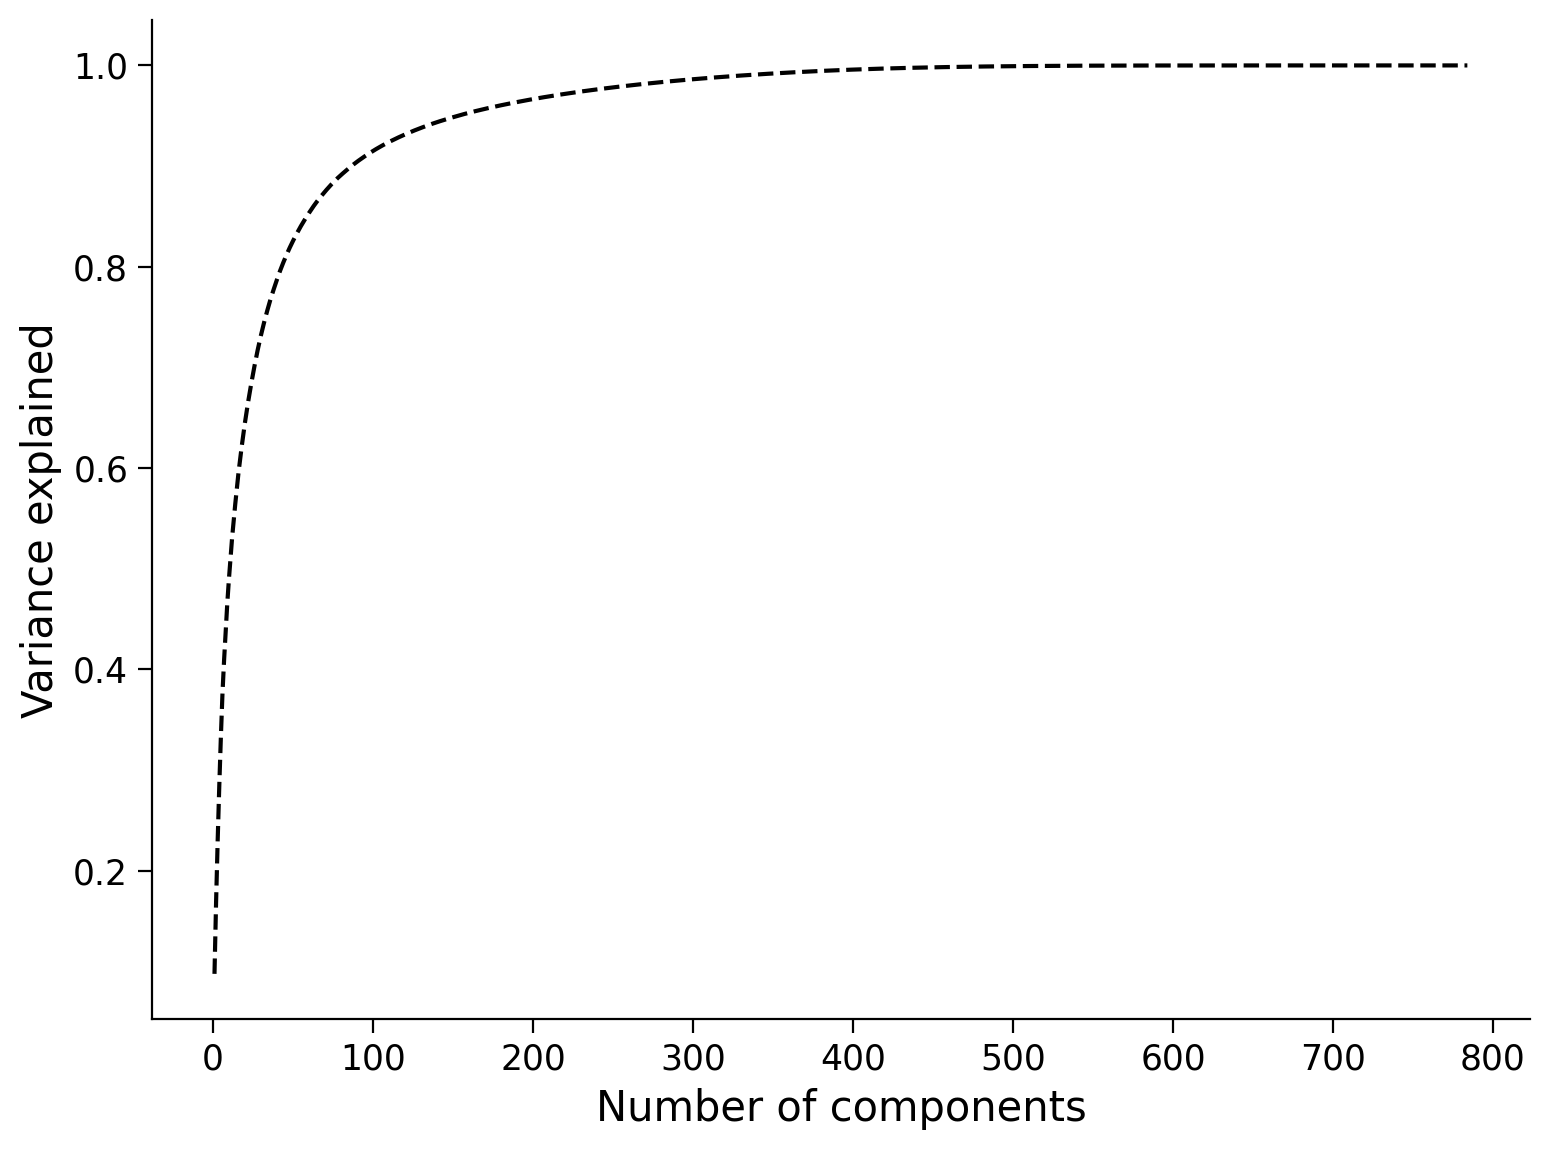

In [26]:
def get_variance_explained(evals):
  """
  Calculates variance explained from the eigenvalues.

  Args:
    evals (numpy array of floats) : Vector of eigenvalues

  Returns:
    (numpy array of floats)       : Vector of variance explained

  """

  # Cumulatively sum the eigenvalues
  csum = np.cumsum(evals)

  # Normalize by the sum of eigenvalues
  variance_explained = csum / np.sum(evals)

  return variance_explained


# Calculate the variance explained
variance_explained = get_variance_explained(evals)

# Visualize
plot_variance_explained(variance_explained)

### Section 3: Reconstruct data with different numbers of PCs

![Screenshot 2023-07-13 at 11.19.33 AM.png](attachment:72aabd57-c385-4b25-bc22-c476122e9539.png)

In [27]:
print(score.shape)
print(evectors.shape)

(70000, 784)
(784, 784)


(784,)
(70000, 784)


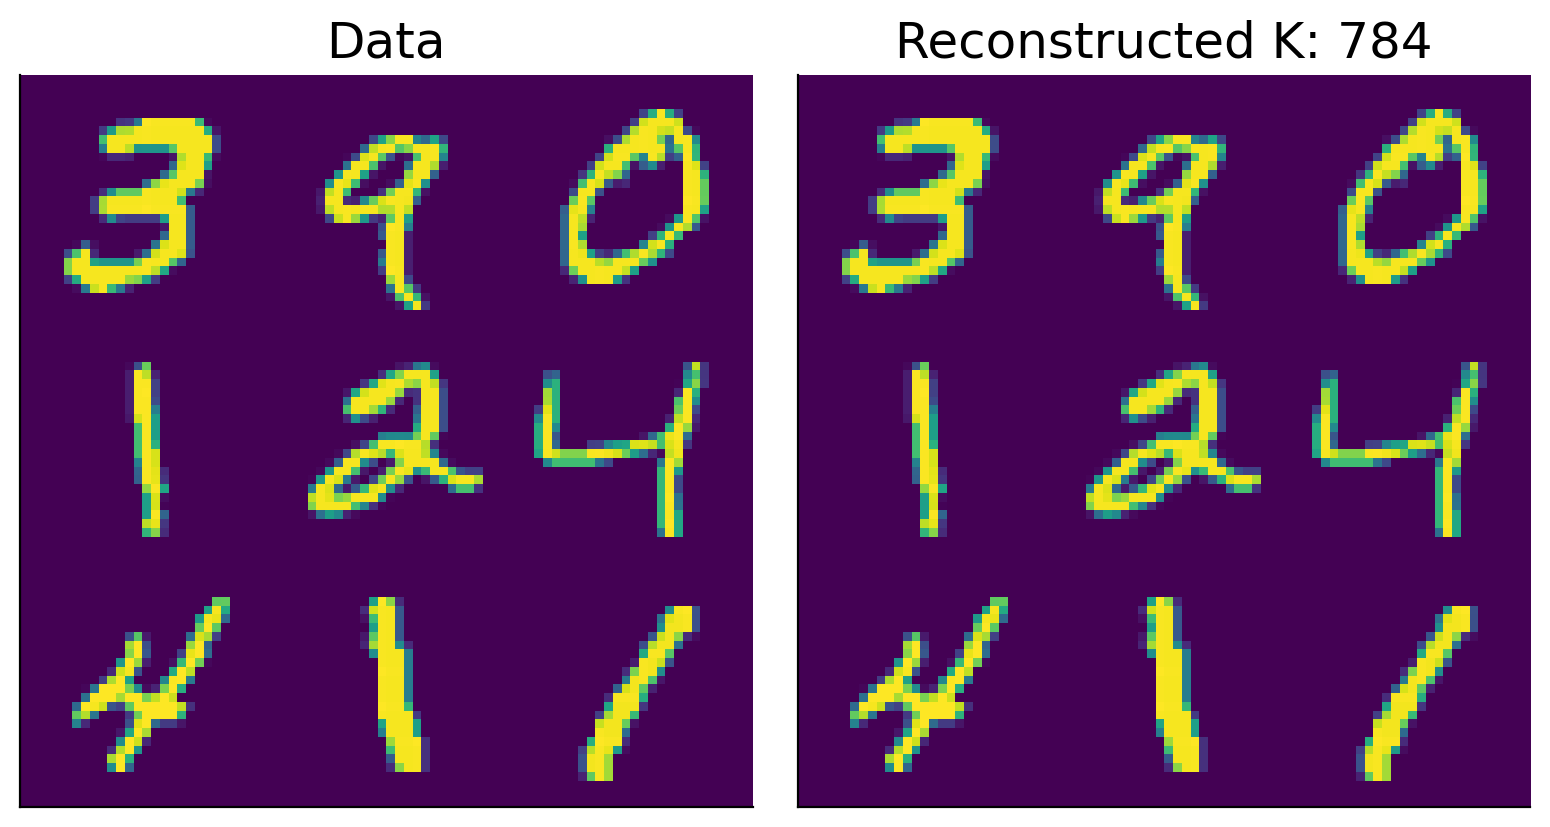

In [28]:
def reconstruct_data(score, evectors, X_mean, K):
  """
  Reconstruct the data based on the top K components.

  Args:
    score (numpy array of floats)    : Score matrix
    evectors (numpy array of floats) : Matrix of eigenvectors
    X_mean (numpy array of floats)   : Vector corresponding to data mean
    K (scalar)                       : Number of components to include

  Returns:
    (numpy array of floats)          : Matrix of reconstructed data

  """

  # Reconstruct the data from the score and eigenvectors
  # Don't forget to add the mean!!
  X_reconstructed =  score[:, :K] @ evectors[:, :K].T + X_mean

  return X_reconstructed


K = score.shape[1]  # data dimensions

# Reconstruct the data based on all components
X_mean = np.mean(X, 0)
print(X_mean.shape)
X_reconstructed = reconstruct_data(score, evectors, X_mean, K)
print(X_reconstructed.shape)

# Plot the data and reconstruction
plot_MNIST_reconstruction(X, X_reconstructed, K)

In [29]:
# @markdown Make sure you execute this cell to enable the widget!

def refresh(K=100):
  X_reconstructed = reconstruct_data(score, evectors, X_mean, K)
  plot_MNIST_reconstruction(X, X_reconstructed, K)


_ = widgets.interact(refresh, K=(1, 784, 10))

interactive(children=(IntSlider(value=100, description='K', max=784, min=1, step=10), Output()), _dom_classes=…

### Section 4: Visualize PCA components

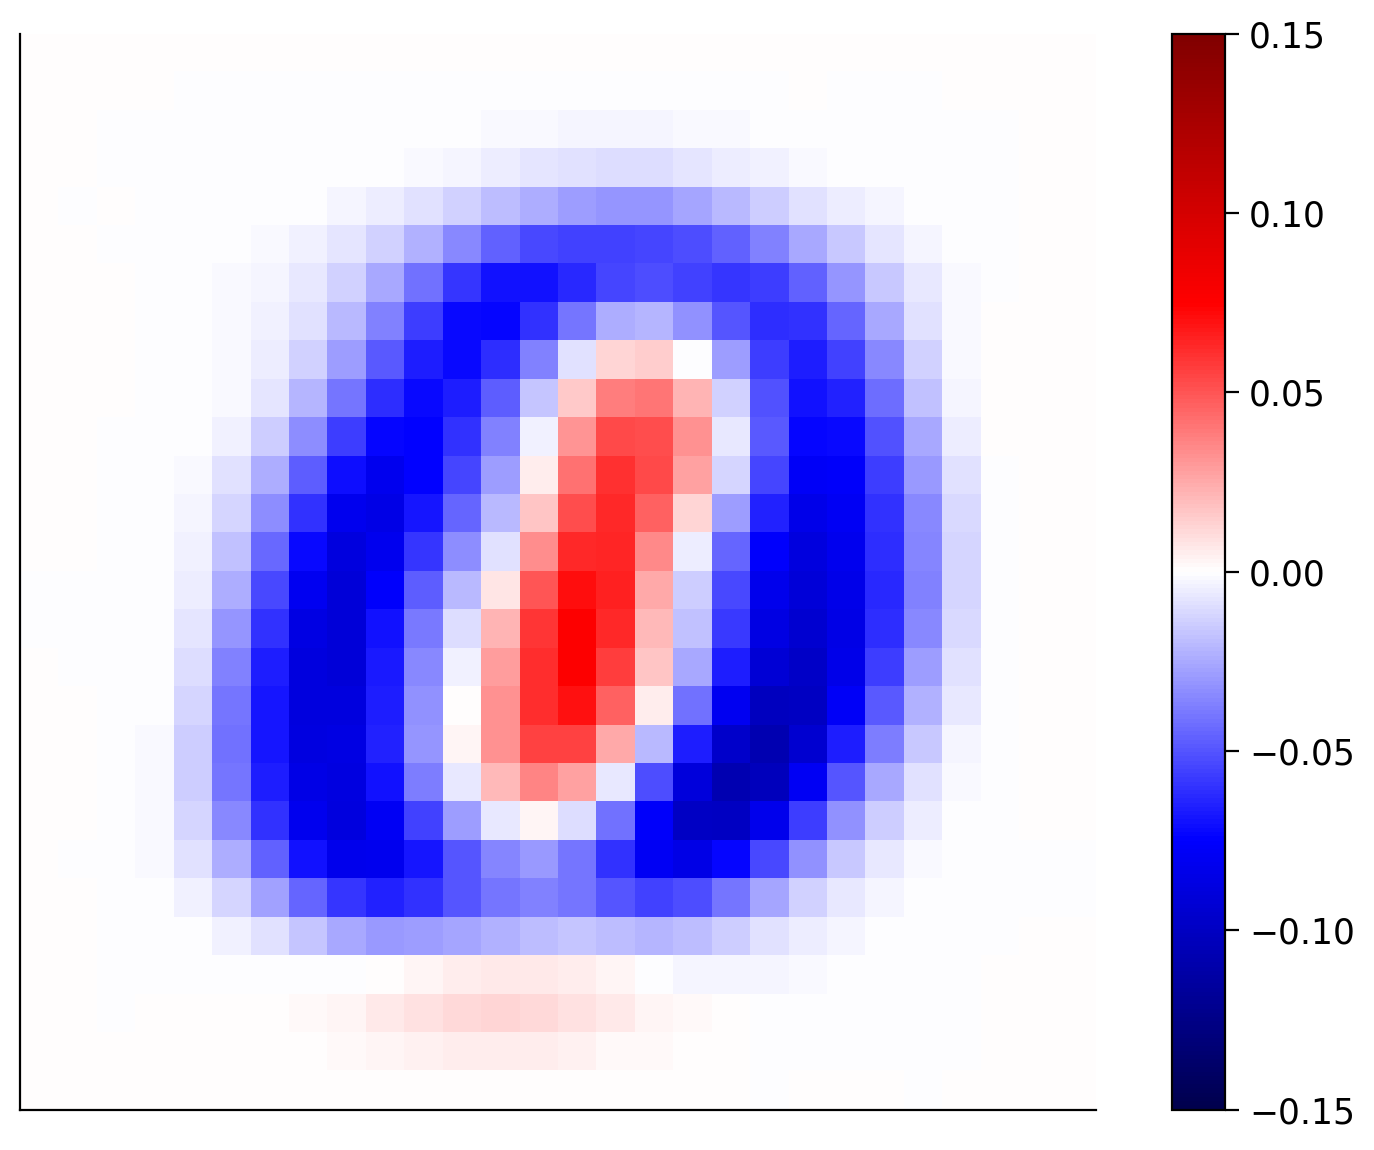

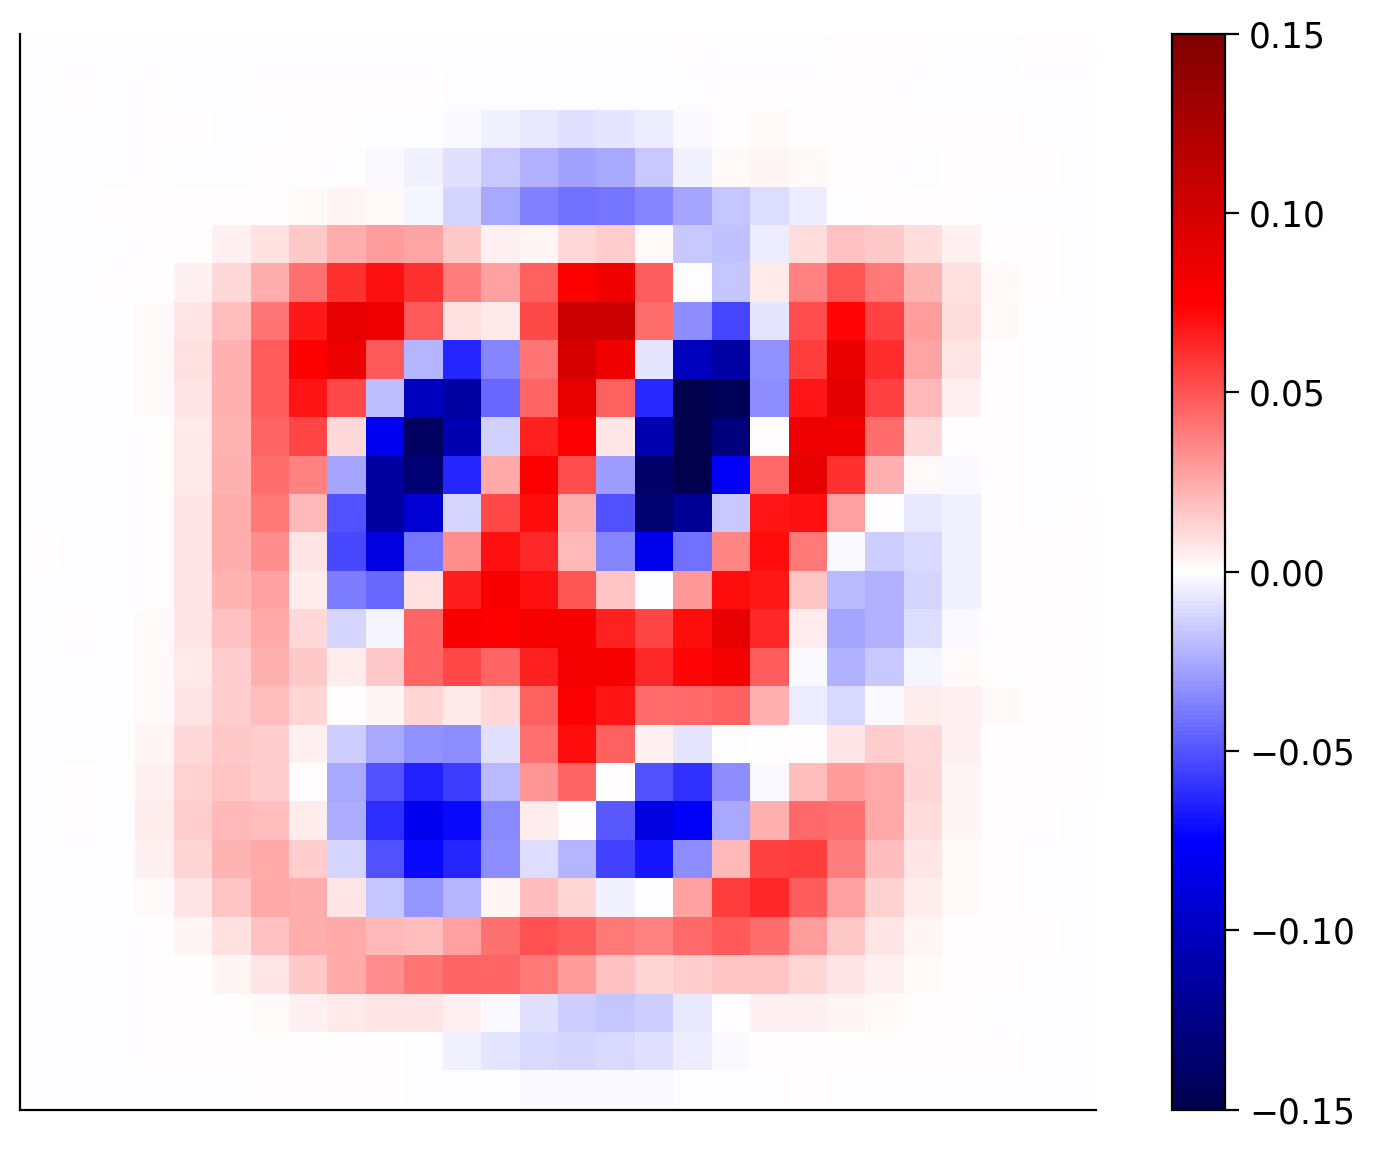

In [30]:
# Plot the weights of the first principal component
plot_MNIST_weights(evectors[:, 0])
plot_MNIST_weights(evectors[:, 10])

### Bonus Section 1: Examine denoising using PCA

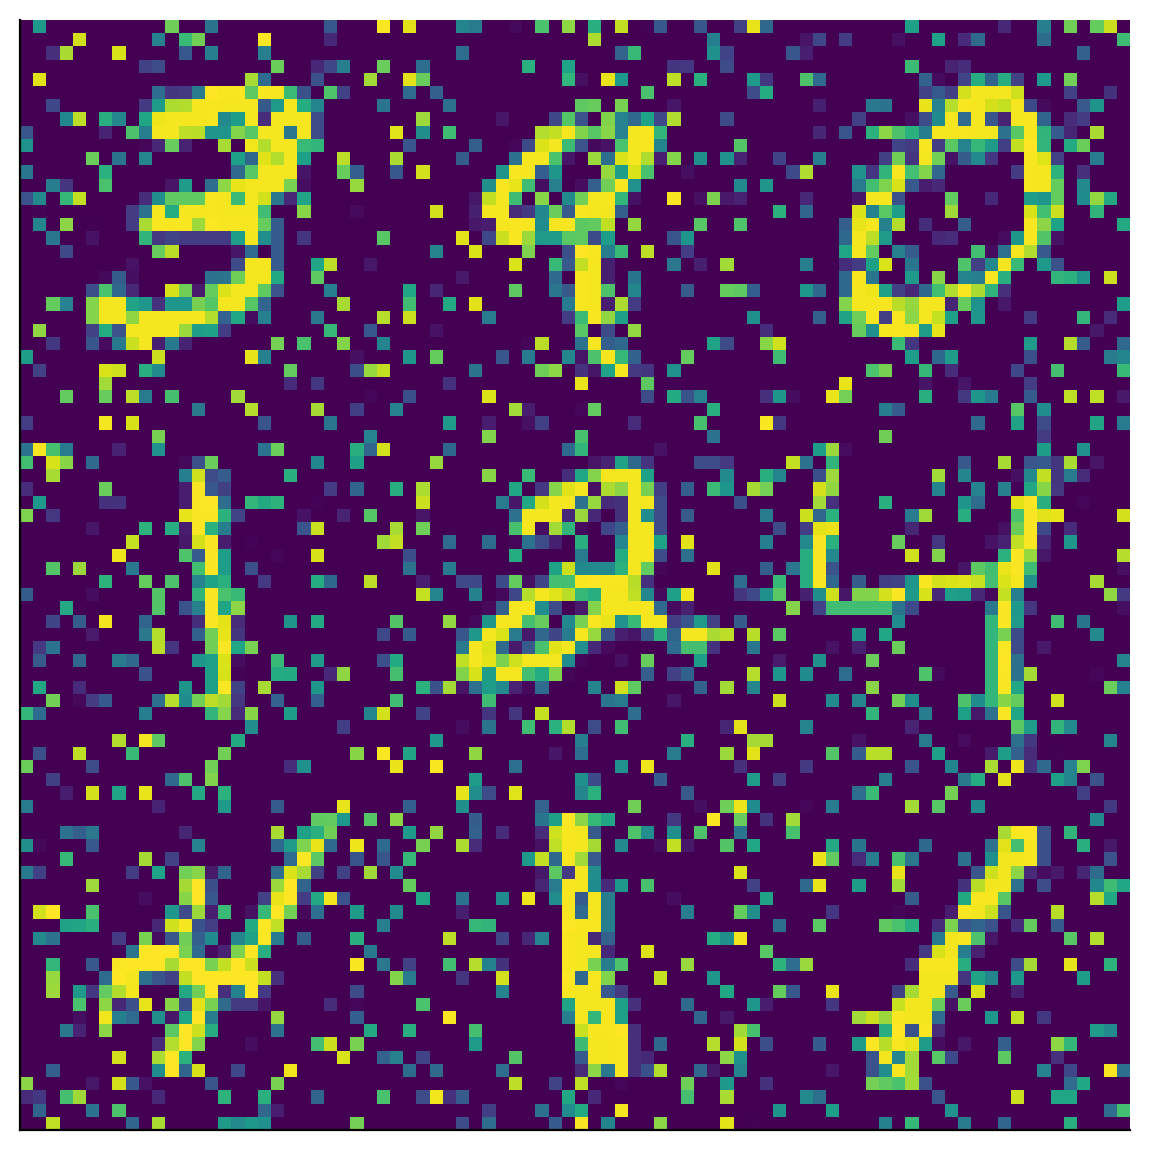

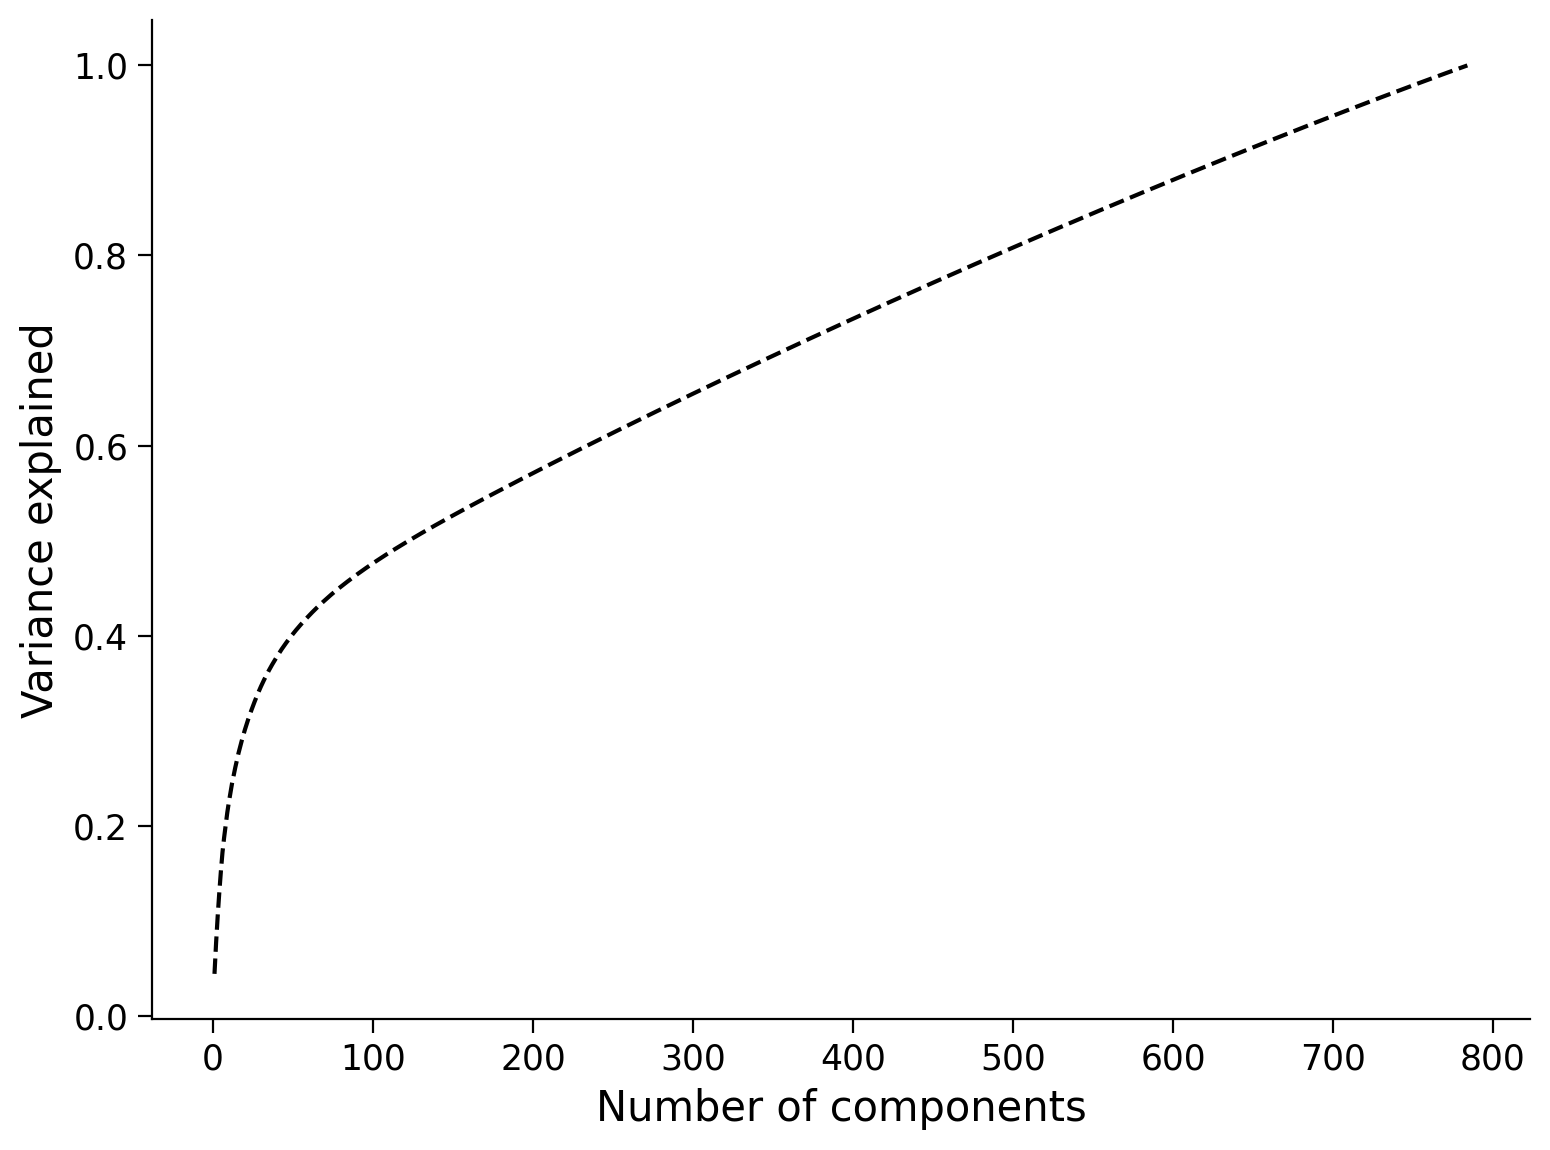

In [31]:
np.random.seed(2020)  # set random seed

# Add noise to data
X_noisy = add_noise(X, 0.2)

# Perform PCA on noisy data
score_noisy, evectors_noisy, evals_noisy = pca(X_noisy)

# Compute variance explained
variance_explained_noisy = get_variance_explained(evals_noisy)

# Visualize
plot_MNIST_sample(X_noisy)
plot_variance_explained(variance_explained_noisy)

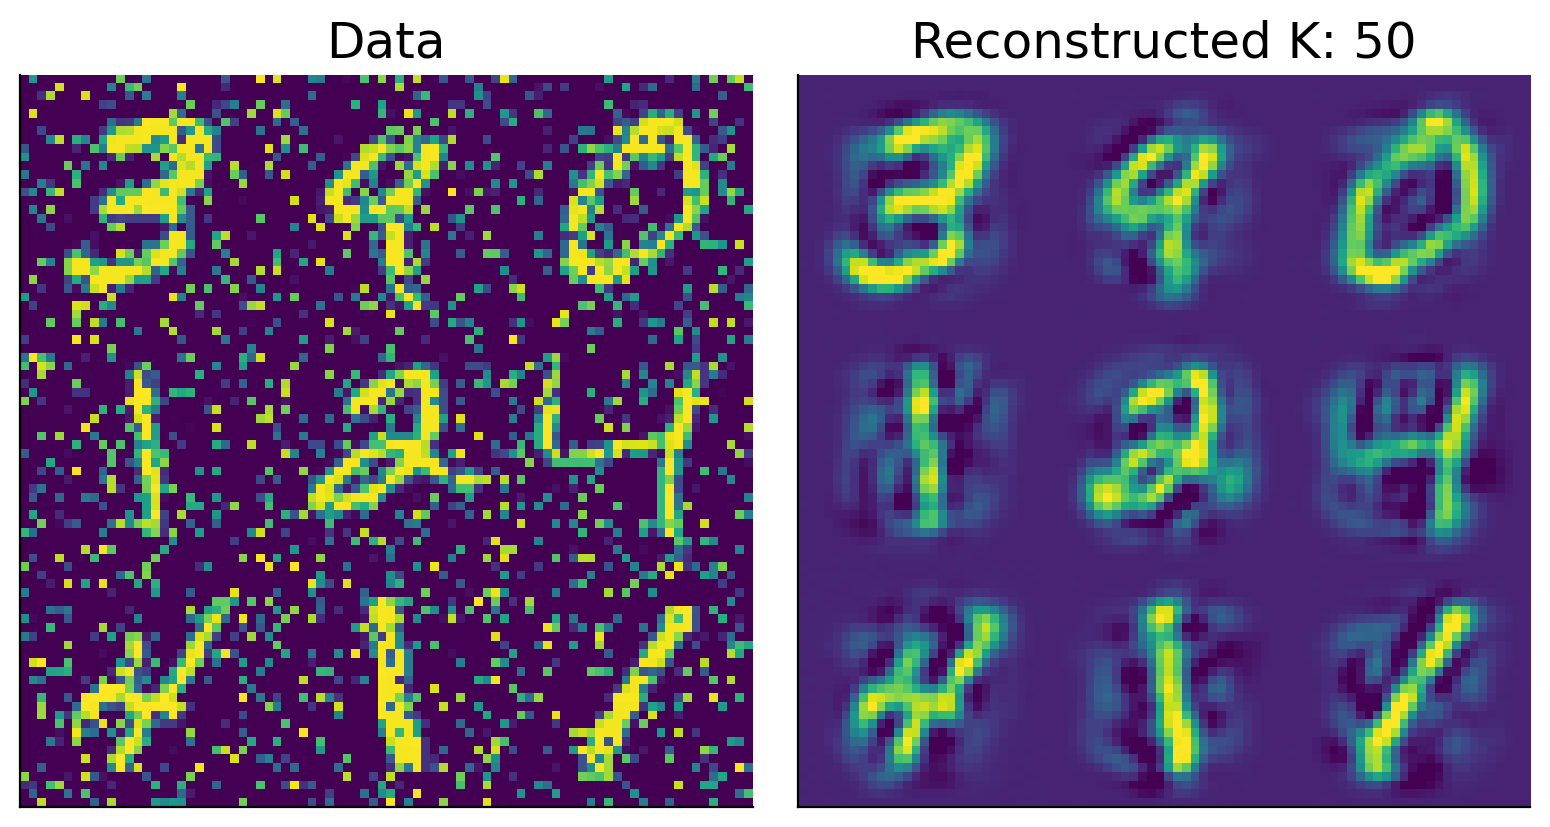

In [32]:
np.random.seed(2020)  # set random seed

# Add noise to data
X_noisy = add_noise(X, 0.2)

# Compute mean of noise-corrupted data
X_noisy_mean = np.mean(X_noisy, axis=0)

# Project onto the original basis vectors
projX_noisy = (X_noisy - X_mean) @ evectors

# Reconstruct the data using the top 50 components
K = 50
X_reconstructed = reconstruct_data(projX_noisy, evectors, X_noisy_mean, K)

# Visualize
plot_MNIST_reconstruction(X_noisy, X_reconstructed, K)

## Tutorial 4: Nonlinear Dimensionality Reduction

In [33]:
# @title Plotting Functions

def visualize_components(component1, component2, labels, show=True):
  """
  Plots a 2D representation of the data for visualization with categories
  labelled as different colors.

  Args:
    component1 (numpy array of floats) : Vector of component 1 scores
    component2 (numpy array of floats) : Vector of component 2 scores
    labels (numpy array of floats)     : Vector corresponding to categories of
                                         samples

  Returns:
    Nothing.

  """

  plt.figure()
  plt.scatter(x=component1, y=component2, c=labels, cmap='tab10')
  plt.xlabel('Component 1')
  plt.ylabel('Component 2')
  plt.colorbar(ticks=range(10))
  plt.clim(-0.5, 9.5)
  if show:
    plt.show()

### Section 1: Visualize MNIST in 2D using PCA

In [34]:
from sklearn.datasets import fetch_openml

# Get images
mnist = fetch_openml(name='mnist_784', as_frame=False, parser='auto')
X_all = mnist.data

# Get labels
labels_all = np.array([int(k) for k in mnist.target])

In [35]:
from sklearn.decomposition import PCA

# Initializes PCA
pca_model = PCA(n_components=2)

# Performs PCA
pca_model.fit(X_all)

PCA(n_components=2)

In [36]:
print(X_all.shape)
print(labels_all.shape)

(70000, 784)
(70000,)


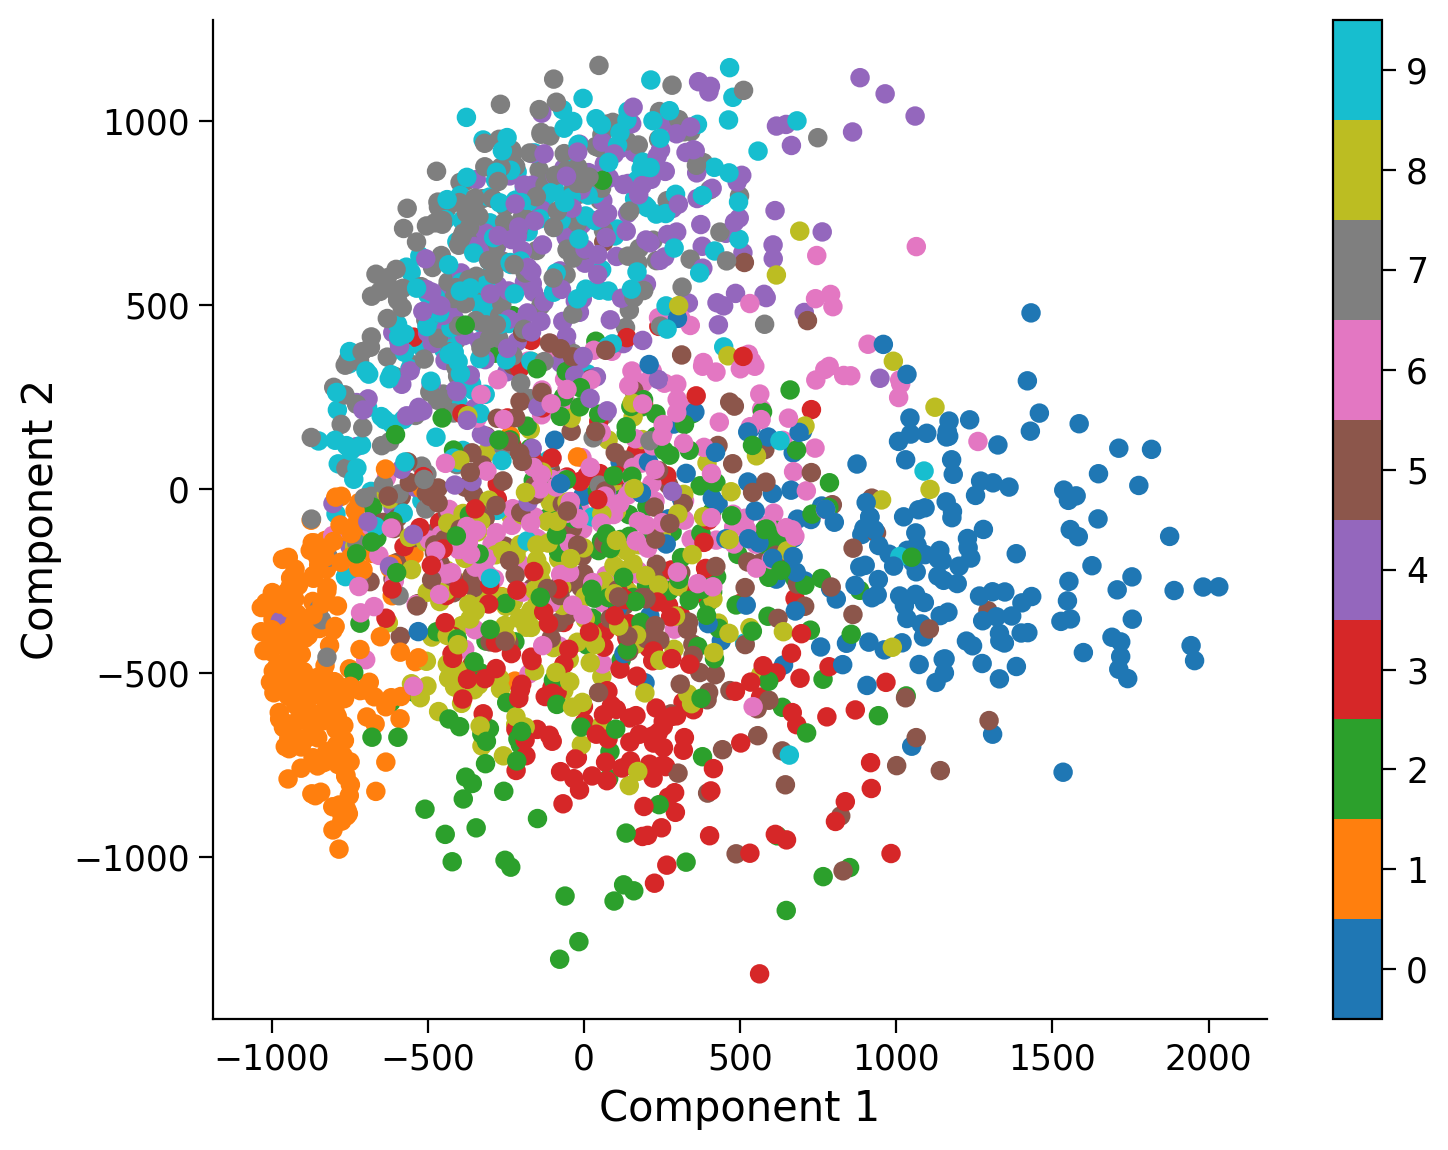

In [41]:
# Take only the first 2000 samples with the corresponding labels
X, labels = X_all[:2000,:], labels_all[:2000]

# Perform PCA
scores = pca_model.transform(X)

# Plot the data and reconstruction
visualize_components(scores[:, 0], scores[:, 1], labels)

### Section 2: Visualize MNIST in 2D using t-SNE

In [42]:
from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2, perplexity=30, random_state=2020)

(2000, 2)


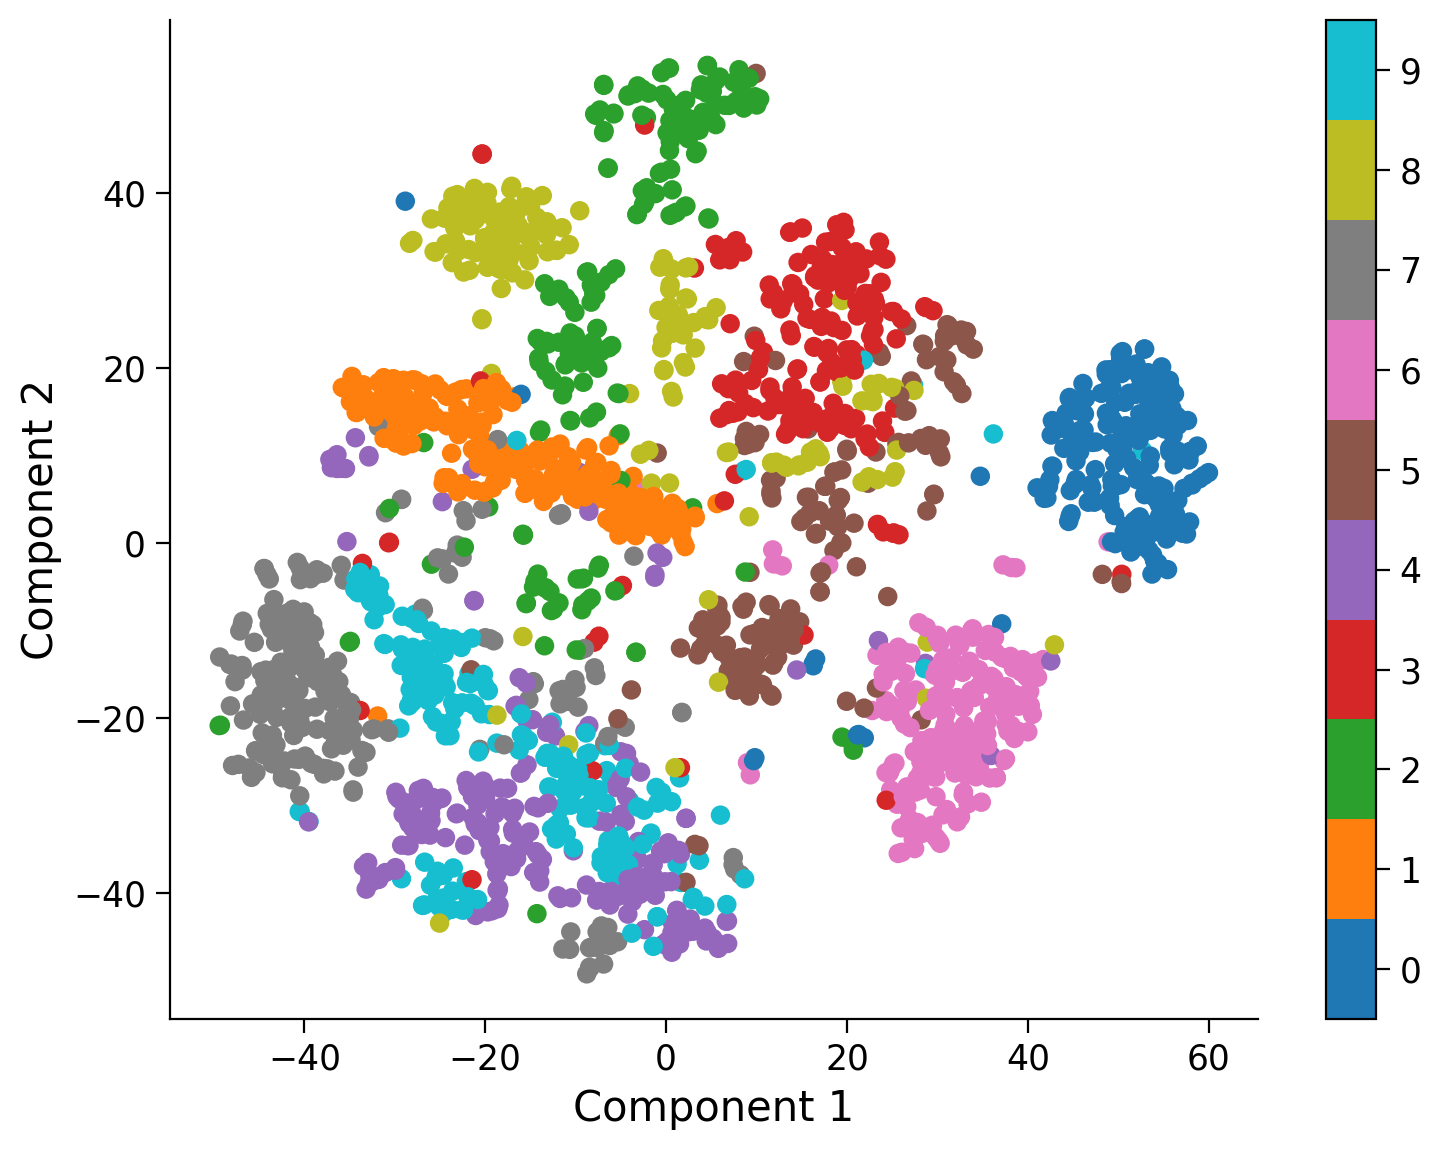

In [43]:
# Perform t-SNE
embed = tsne_model.fit_transform(X)

print(embed.shape)

# Visualize the data
visualize_components(embed[:, 0], embed[:, 1], labels)

larger values of **perplexity** preserves more global information - drawn closer to a larger number of neighbors

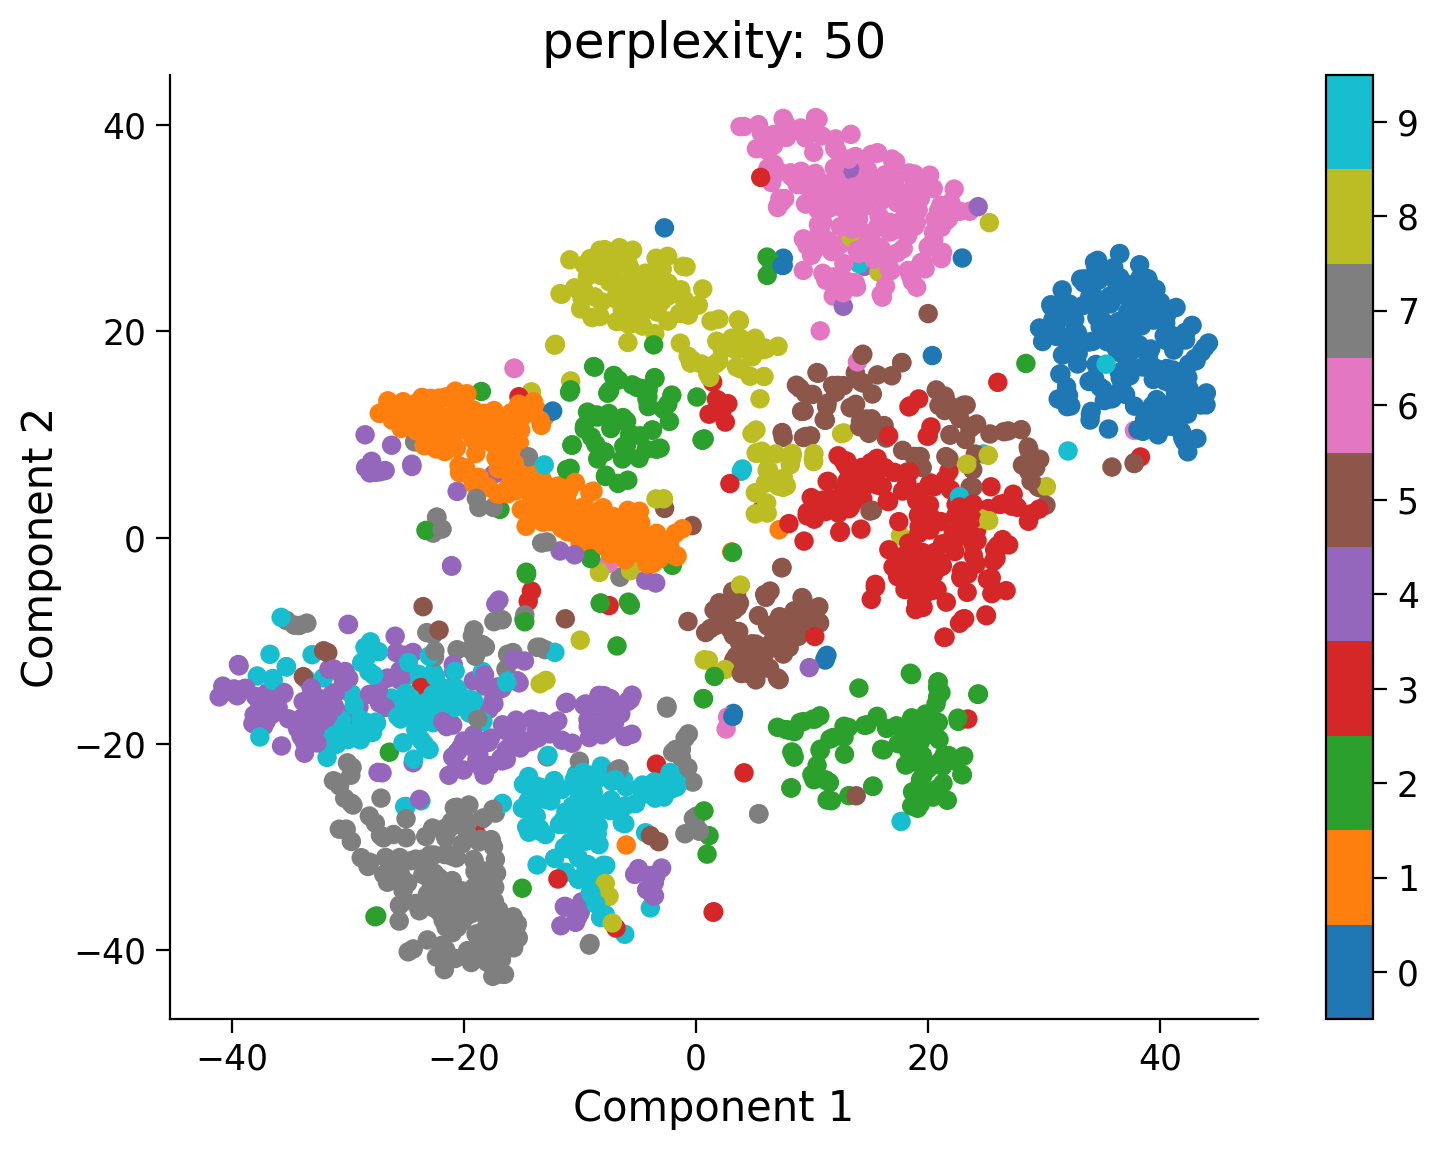

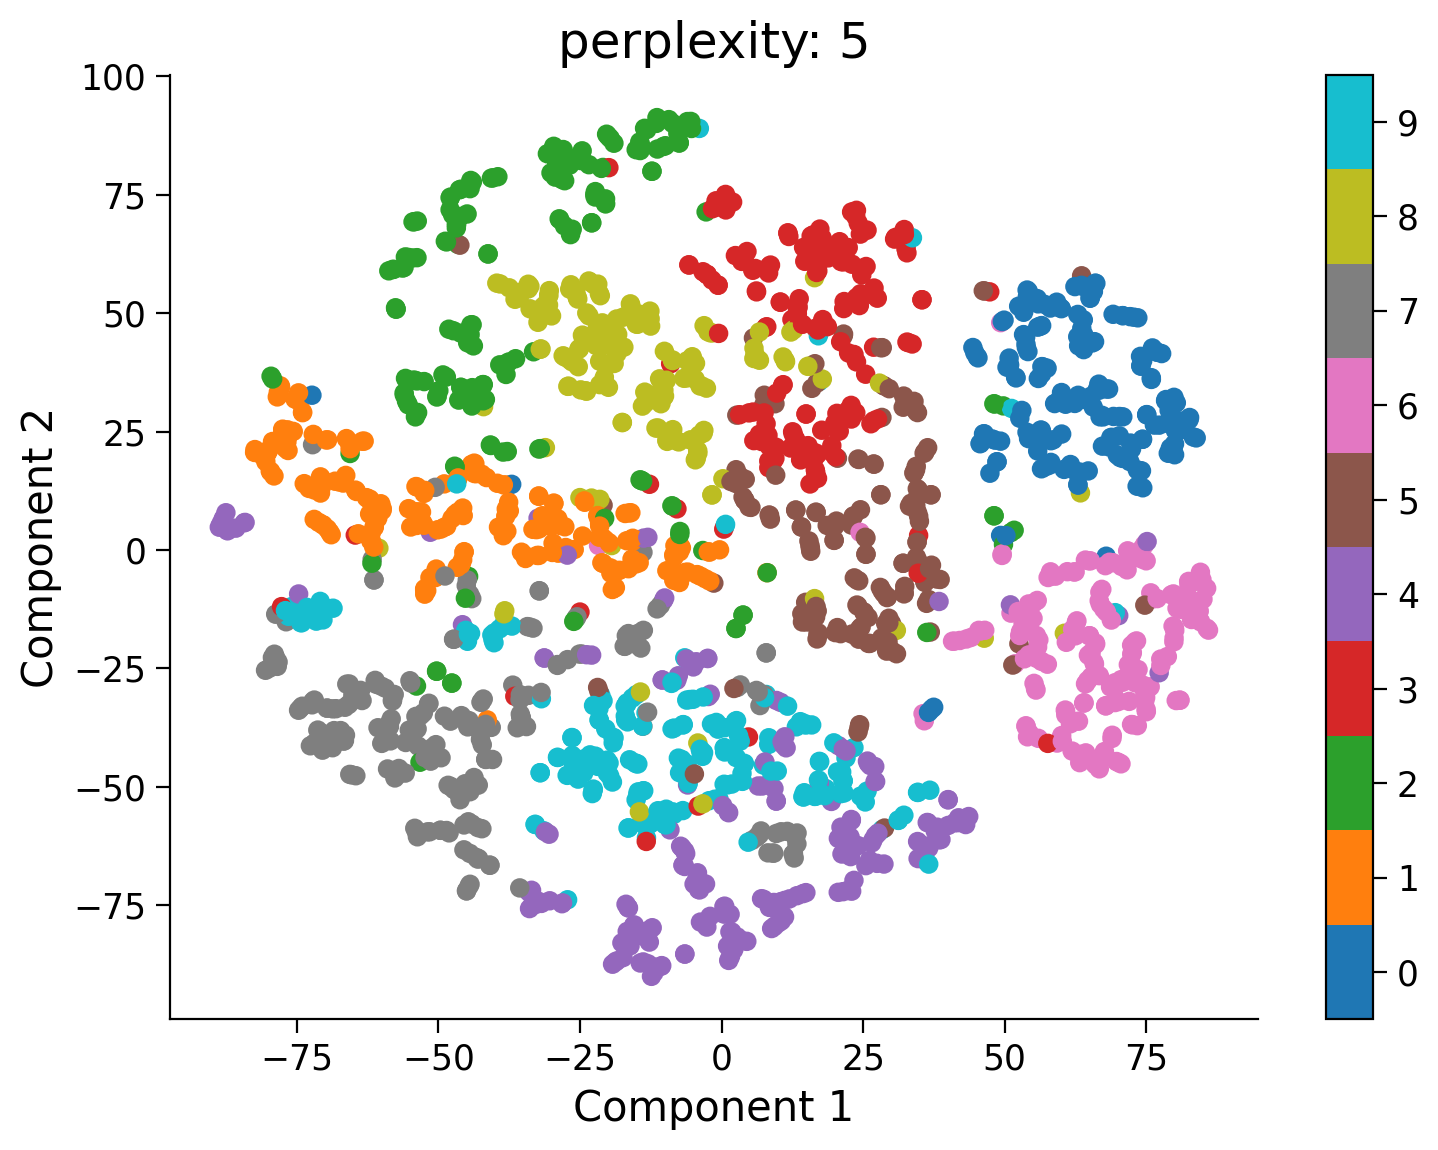

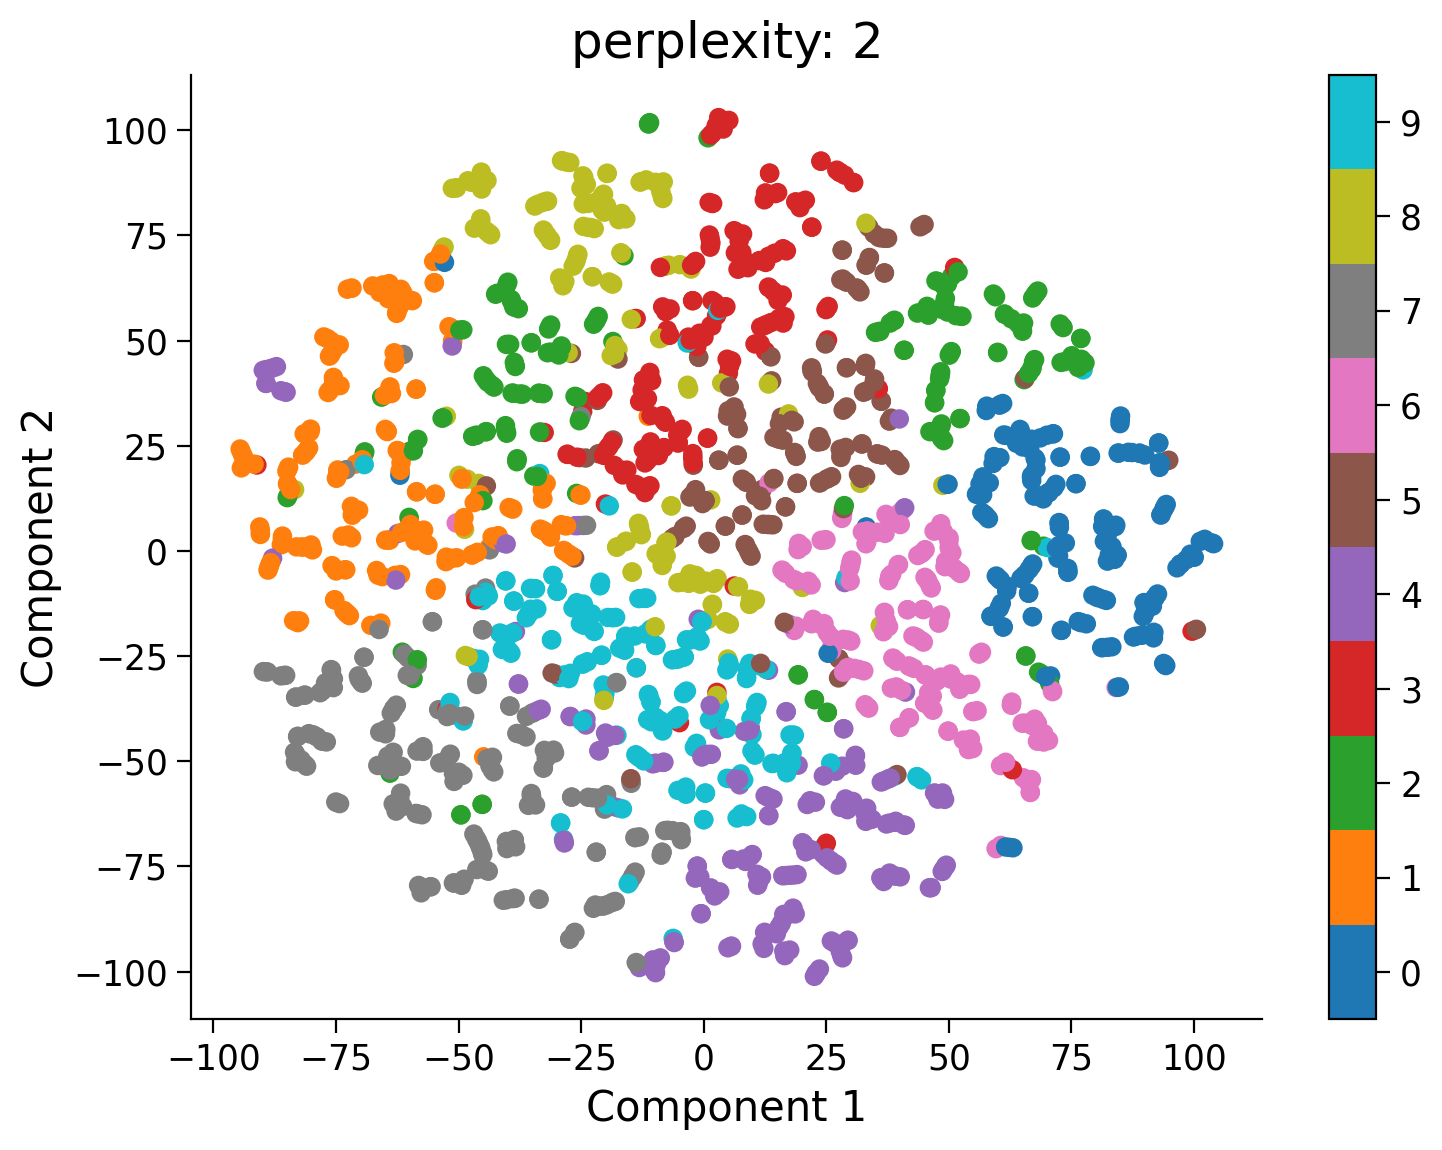

In [44]:
def explore_perplexity(values, X, labels):
  """
  Plots a 2D representation of the data for visualization with categories
  labeled as different colors using different perplexities.

  Args:
    values (list of floats) : list with perplexities to be visualized
    X (np.ndarray of floats) : matrix with the dataset
    labels (np.ndarray of int) : array with the labels

  Returns:
    Nothing.

  """
  for perp in values:
    # Perform t-SNE
    tsne_model = TSNE(n_components=2, perplexity=perp, random_state=2020)

    embed = tsne_model.fit_transform(X)
    visualize_components(embed[:, 0], embed[:, 1], labels, show=False)
    plt.title(f"perplexity: {perp}")


# Visualize
values = [50, 5, 2]
explore_perplexity(values, X, labels)